In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Sourcing

#### Load and read CarPrice_Assignment.csv to data frame

In [2]:
# load provided dataset
master_df = pd.read_csv("CarPrice_Assignment.csv", sep=',', encoding = "ISO-8859-1")
master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Display information
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
# Describe dataframe
master_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Show columns in the dataframe
master_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Assumptions and Approach

    1.  Car_ID column has only unique vlaues so this will be removed as it is not going to help in current analysis.
    2.  If any columns has more than 90% null values drop them.
    3.  All float values will be rounded to 2 decimal places.
    4.  Company name will be extracted from Car name column and then spelling mistakes will be corrected.
    5.  Column fuelsystem value - mfi is another name of mpfi (Multi-port fuel injection). This will be corrected.
    6.  EDA Analysis will involve Univariate analysis, Segmented Univariate analysis and Bivariate analysis
    7.  Data Preperation by converting catagorical variables to dummy variables.
    8.  Derive new variables like combined MPG
    9.  Create test and training data sets
    10. Rescale feature variables using minmax scaler
    11. Check VIF to eliminate any multicollinearity
    12. Perform RFE with output number of variables equal to 20 so that we can remove significant variables
    13. After RFE check VIF and remove varaibles with p value greater than 0.05 and high VIF
    14. Repeat the above process until we reach very low VIF of less than 5 and p values less than 0.05.
    15. Perform residual analysis
    16. Predict using test data and evaluate model

## Custom Functions for various tasks

#### Function to show value on bars in a plot

In [6]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#### Function to draw bar plot

In [7]:
def draw_bar_chart(df, x, y, width, height, title='', xlabel='', ylabel='', xLblRotation=0, 
                   legend=None, message='', showBarVals=False):
    
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
    
    if showBarVals == True:
        show_values_on_bars(ax)
    
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
    
    plt.xticks(rotation=xLblRotation)
    
    plt.show()
    
    if message.strip():
        print(message)

#### Function to draw bar plot with gridspec

In [8]:
def draw_bar_chart_subplot_gridspec(df, x, y, gridspec, title='', xlabel='', ylabel='', xLblRotation=0,
                           legend=None, message='', showBarVals=False, show=False):

    plt.subplot(gridspec)
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
    if showBarVals == True:
        show_values_on_bars(ax)
    
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
    
    plt.xticks(rotation=xLblRotation)
    
    if show == True:
        plt.show()
    
    if message.strip():
        print(message)

#### Function to draw scatter plot

In [9]:
def draw_scatter_plot(df, X, Y, xlabel, ylabel, width=5, height=5, xLblRotation=0, title=None, alpha=0.5):
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    area = np.pi*3
    plt.scatter(x=X, y=Y, data=df, s=area, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xLblRotation)
    plt.title(title)
    plt.show()

##### Function to create dummy variables and drop the variable from master frame

In [10]:
def create_dummy_variable(variable, df_in, dummy_var_to_drop):
    try:
        print(df_in[variable].unique())
        
        # Creating dummy variable for variable
        tempvar = pd.get_dummies(df_in[variable])
        
        # Creating unique names for dummy var columns
        tempvar.rename(lambda x:  variable + '_'+  str(x), axis='columns', inplace=True)
        print(tempvar.head(5))
        
        #Adding the results to the master dataframe
        df_in = pd.concat([df_in, tempvar],axis=1)
        
        # Dropping the variables
        if dummy_var_to_drop is not None:
            print('dropping', dummy_var_to_drop)
            df_in.drop([variable + '_'+  str(dummy_var_to_drop)], axis=1, inplace=True)
        
        print('dropping', variable)
        df_in.drop([variable], axis=1, inplace=True)
        
        print('droped variables')
    except:
        print('Column already converted to dummy variables and dropped...')
    return df_in

#### Function to calculate VIF

In [11]:
def calculate_vif(X):
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame(columns = ['Features', 'VIF'])
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## Data Cleaning

#### Drop car_ID column, we do not need this for linear regression

In [12]:
try:
    print('Dropping car_ID column')
    master_df.drop('car_ID', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping car_ID column


#### Check null values

In [13]:
# Get the percentage of null values for each columns
na_percent = round(master_df.isnull().sum() / len(master_df.index) * 100, 2)
if any(na_percent[na_percent > 0]):
    print("\nColumns having null values along with percentage:,\n", na_percent[na_percent > 0])
else:
    print("\nNone of the Columns have null values.\n", na_percent[na_percent > 0])


None of the Columns have null values.
 Series([], dtype: float64)


#### Round 'price' to 2 decimal places

In [14]:
#  Round 'price' column values to 2 decimal places.
master_df['price'] = round(master_df['price'], 2)
master_df['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Extract company name from CarName

As per problem statement, there is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name.
You need to consider only company name as the independent variable for model building.

In [15]:
master_df['CarName'] = master_df['CarName'].str.strip()
master_df['CompanyName'] = master_df['CarName'].apply(lambda x: x.split(' ')[0])
master_df.drop('CarName',axis=1,inplace=True)
master_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Check company names

In [16]:
master_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Following company names are mis-spelled
1. 'alfa-romeo' is misspelled as 'alfa-romero'
2. 'mazda' is misspelled as 'maxda' 
3. 'porsche' is misspelled as 'porcshce'
4. 'toyota' is misspelled as 'toyouta'
5. 'vokswagen' and 'vw' instead of 'volkswagen'
6. case mismatch for 'Nissan', 'nissan'

#### Fix spelling in company name

In [17]:
# 'alfa-romeo' is misspelled as 'alfa-romero'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("alfa-romero", "alfa-romeo")

# Fix 'maxda' by replacing with correct spelling 'mazda'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("maxda", "mazda")

# Fix 'porcshce' by replacing with correct spelling 'porsche'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("porcshce", "porsche")

# Fix 'toyouta' by replacing with correct spelling 'toyota'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("toyouta", "toyota")

# Replacing 'vokswagen' and 'vw' with correct spelling 'volkswagen'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("vokswagen", "volkswagen")
master_df['CompanyName'] = master_df['CompanyName'].str.replace("vw", "volkswagen")

# Fix 'Nissan' by replacing with 'nissan'
master_df['CompanyName'] = master_df['CompanyName'].str.replace("Nissan", "nissan")

master_df.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Check fuel system

In [18]:
master_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### Fuel system mfi also known as mpfi - multi-port fuel injection, renaming mfi to mpfi

In [19]:
master_df['fuelsystem'] = master_df['fuelsystem'].str.replace("mfi", "mpfi")
master_df.fuelsystem.unique()

array(['mpfi', '2bbl', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### Drop duplicates (if any)

In [20]:
master_df=master_df.drop_duplicates()

#### Check data after cleaning

In [21]:
master_df.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.00,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.00,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.00,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.00,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.00,audi
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.00,audi
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.00,audi
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.00,audi
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.00,audi
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.17,audi


## Exploratory Data Analysis

#### Analysis of symboling

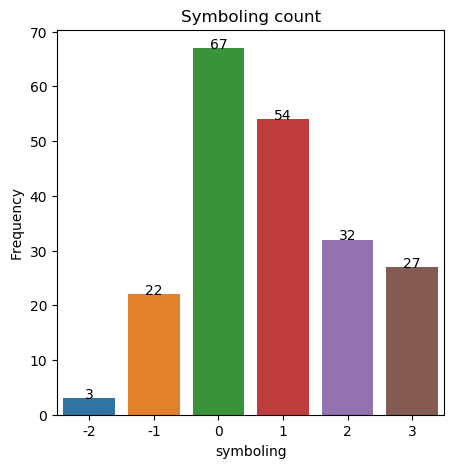

In symboling : 0 has highest frequency. 
We can remove symboling:-2, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2'}

In [22]:
# symboling - Categorical variable

# Plot frequency bar chart for symboling column 
symboling_freq = master_df.groupby(master_df.symboling).size().reset_index(name='Frequency')

draw_bar_chart(symboling_freq,'symboling','Frequency',5,5,'Symboling count','symboling','Frequency',0,None,'',True)

print('In symboling : 0 has highest frequency.',
      '\nWe can remove symboling:-2, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# Lets create a dictionary of columns to be removed while creating dummy variables so that it will be easy to get the list
remove_for_dummy = {'symboling':'-2'}
remove_for_dummy

#### Analysis of fueltype

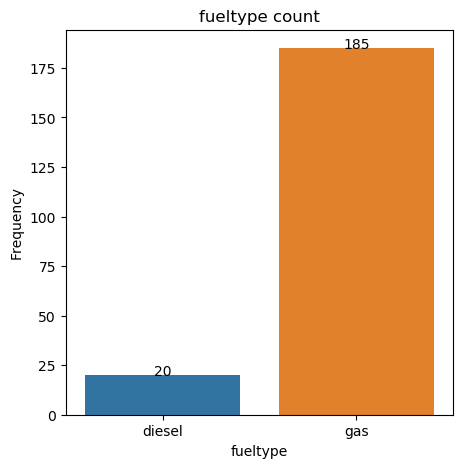

In fueltype : 'gas' is more preferred. 
We can remove fueltype:diesel, it has very low frequency in comparison to gas, would not contribute much in analysis.


{'symboling': '-2', 'fueltype': 'diesel'}

In [23]:
# fueltype - Categorical variable

# Plot frequency bar chart for fueltype column 
fueltype_freq = master_df.groupby(master_df.fueltype).size().reset_index(name='Frequency')

draw_bar_chart(fueltype_freq,'fueltype','Frequency',5,5,'fueltype count','fueltype','Frequency',0,None,'',True)

print("In fueltype : 'gas' is more preferred.",
      '\nWe can remove fueltype:diesel, it has very low frequency in comparison to gas, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['fueltype'] = 'diesel'
remove_for_dummy

#### Analysis of aspiration

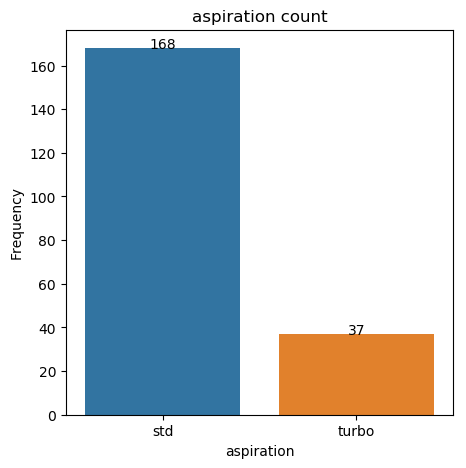

In aspiration : 'std' been used more. 
We can remove aspiration:turbo, it has very low frequency in comparison to std, would not contribute much in analysis.


{'symboling': '-2', 'fueltype': 'diesel', 'aspiration': 'turbo'}

In [24]:
# aspiration - Categorical variable

# Plot frequency bar chart of aspiration column 
aspiration_freq = master_df.groupby(master_df['aspiration']).size().reset_index(name='Frequency')

draw_bar_chart(aspiration_freq,'aspiration','Frequency',5,5,'aspiration count','aspiration','Frequency',0, None,'',True)

print("In aspiration : 'std' been used more.",
      '\nWe can remove aspiration:turbo, it has very low frequency in comparison to std, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['aspiration'] = 'turbo'
remove_for_dummy      

#### Analysis of doornumber

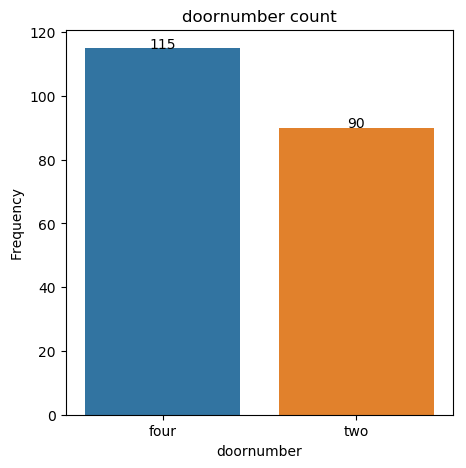

In doornumber : 'four' is more preferred.


In [25]:
# doornumber - Categorical variable

# Plot frequency bar chart 
doornumber_freq = master_df.groupby(master_df['doornumber']).size().reset_index(name='Frequency')

draw_bar_chart(doornumber_freq,'doornumber','Frequency',5,5,'doornumber count','doornumber','Frequency',0,None,'',True)

print("In doornumber : 'four' is more preferred.")

#### Analysis of carbody

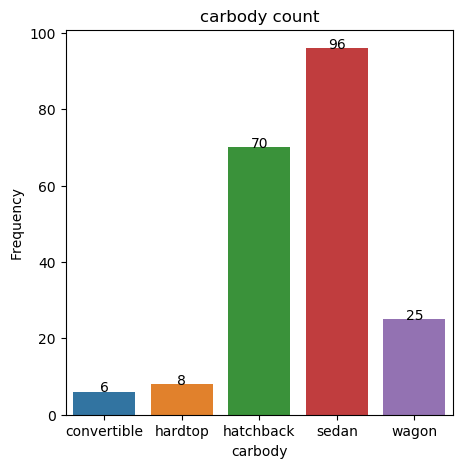

In carbody : 'sedan' been used more. 
We can remove carbody:convertible, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible'}

In [26]:
# carbody - Categorical variable

# Plot frequency bar chart 
carbody_freq = master_df.groupby(master_df['carbody']).size().reset_index(name='Frequency')

draw_bar_chart(carbody_freq,'carbody','Frequency',5,5,'carbody count','carbody','Frequency',0,None,'',True)

print("In carbody : 'sedan' been used more.",
      '\nWe can remove carbody:convertible, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['carbody'] = 'convertible'
remove_for_dummy       

#### Analysis of drivewheel

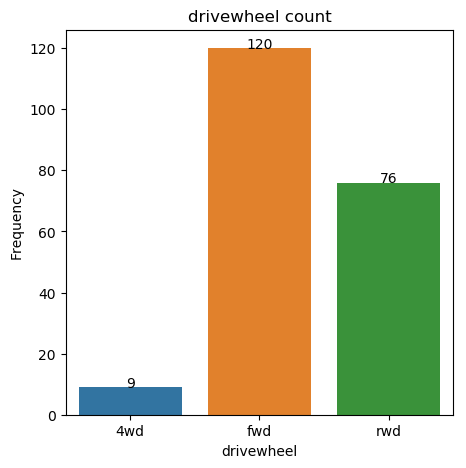

In drivewheel : 'fwd' has high frequency. 
We can remove drivewheel:4wd, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd'}

In [27]:
# drivewheel - Categorical variable

# Plot frequency bar chart 
drivewheel_freq = master_df.groupby(master_df['drivewheel']).size().reset_index(name='Frequency')

draw_bar_chart(drivewheel_freq,'drivewheel','Frequency',5,5,'drivewheel count','drivewheel','Frequency',0,None,'',True)

print("In drivewheel : 'fwd' has high frequency.",
      '\nWe can remove drivewheel:4wd, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['drivewheel'] = '4wd'
remove_for_dummy      

#### Analysis of enginelocation

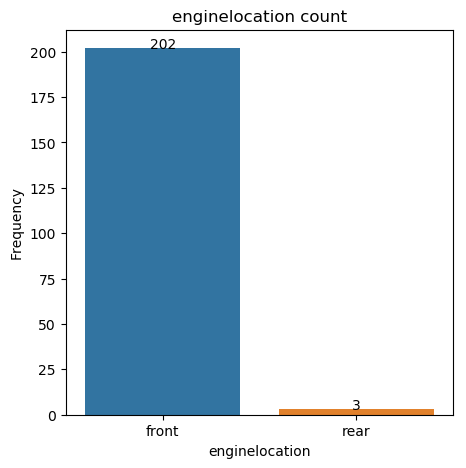

In enginelocation: 'front' is more preferred. 
We can remove enginelocation:rear, it has very low frequency in comparison to front, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear'}

In [28]:
# enginelocation - Categorical variable

# Plot frequency bar chart
eloc_freq = master_df.groupby(master_df['enginelocation']).size().reset_index(name='Frequency')

draw_bar_chart(eloc_freq,'enginelocation','Frequency',5,5,'enginelocation count','enginelocation','Frequency',0,None,'',True)

print("In enginelocation: 'front' is more preferred.",
      '\nWe can remove enginelocation:rear, it has very low frequency in comparison to front, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['enginelocation'] = 'rear'
remove_for_dummy        

#### Analysis of enginetype

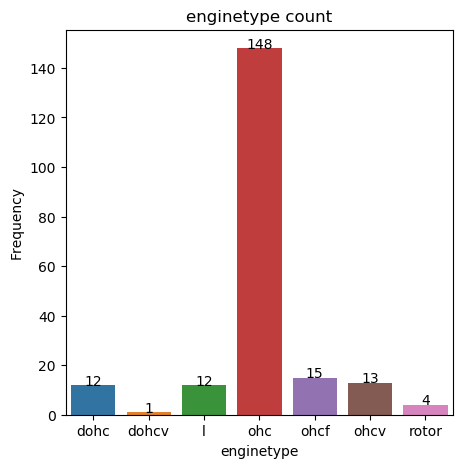

In enginetype: 'ohc' has high frequency. 
We can remove enginetype:dohcv, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv'}

In [29]:
# enginetype - Categorical variable

# Plot frequency bar chart
enginetype_freq = master_df.groupby(master_df['enginetype']).size().reset_index(name='Frequency')

draw_bar_chart(enginetype_freq,'enginetype','Frequency',5,5,'enginetype count','enginetype','Frequency',0,None,'',True)

print("In enginetype: 'ohc' has high frequency.",
      '\nWe can remove enginetype:dohcv, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['enginetype'] = 'dohcv'
remove_for_dummy

#### Analysis of cylindernumber

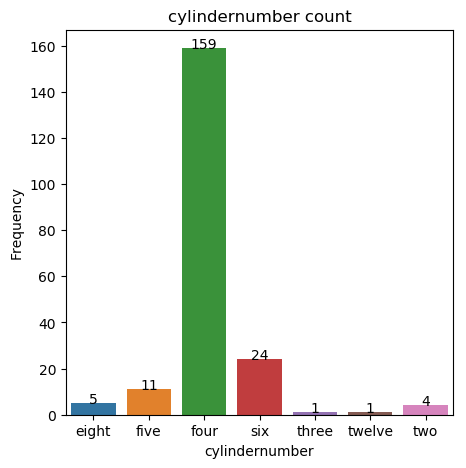

In cylindernumber: 'four' been used more. 
We can remove cylindernumber:twelve / three, very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'twelve'}

In [30]:
# cylindernumber - Categorical variable

# Plot frequency bar chart
cyl_freq = master_df.groupby(master_df['cylindernumber']).size().reset_index(name='Frequency')

draw_bar_chart(cyl_freq,'cylindernumber','Frequency',5,5,'cylindernumber count','cylindernumber','Frequency',0,None,'',True)

print("In cylindernumber: 'four' been used more.",
      '\nWe can remove cylindernumber:twelve / three, very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['cylindernumber'] = 'twelve'
remove_for_dummy

#### Analysis of fuelsystem

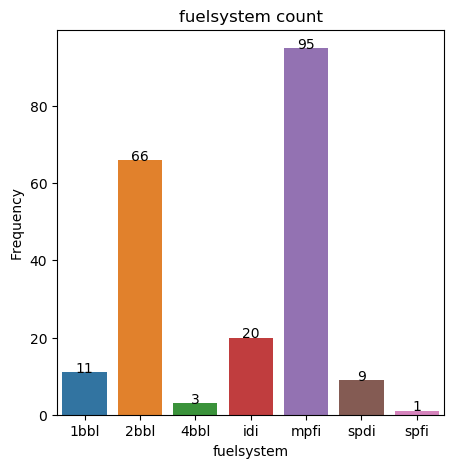

In fuelsystem: 'mpfi' has high frequency. 
We can remove fuelsystem:spfi, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'twelve',
 'fuelsystem': 'spfi'}

In [31]:
# fuelsystem - Categorical variable

# Plot frequency bar chart
fuelsystem_freq = master_df.groupby(master_df['fuelsystem']).size().reset_index(name='Frequency')

draw_bar_chart(fuelsystem_freq,'fuelsystem','Frequency', 5, 5,'fuelsystem count','fuelsystem','Frequency',0,None,'',True)

print("In fuelsystem: 'mpfi' has high frequency.",
      '\nWe can remove fuelsystem:spfi, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['fuelsystem'] = 'spfi'
remove_for_dummy

#### Analysis of wheelbase

Mean of wheelbase = 98.76
Median of wheelbase = 97.0
Mode of wheelbase = 94.5


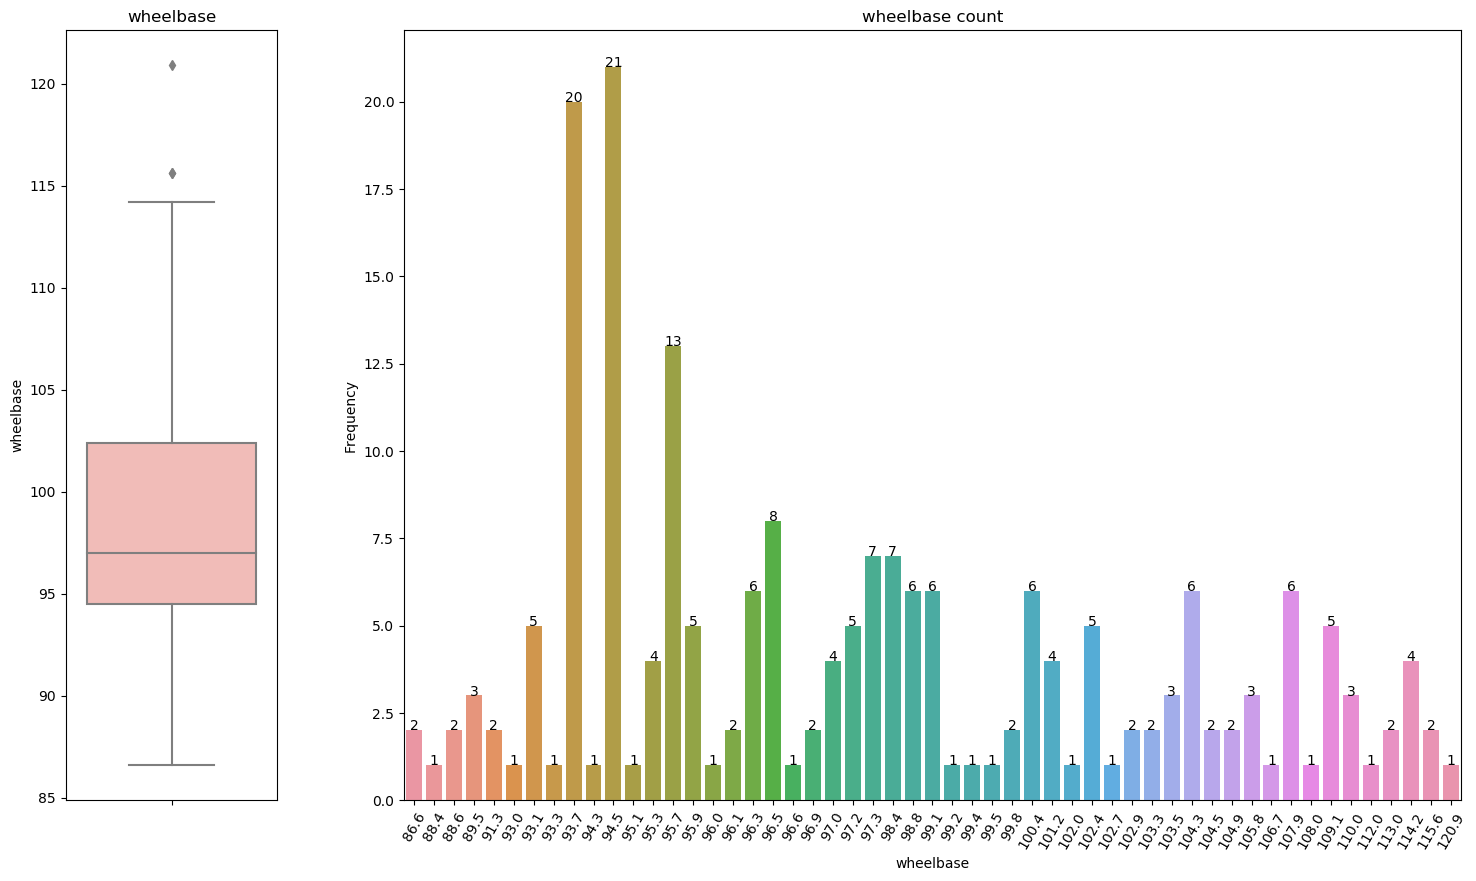

In wheelbase : 94.5 has high frequency. There are some outliers as well.


In [32]:
columnName = 'wheelbase'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
wheelbase_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(wheelbase_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In wheelbase : 94.5 has high frequency. There are some outliers as well.")

#### Analysis of carlength

Mean of carlength = 174.05
Median of carlength = 173.2
Mode of carlength = 157.3


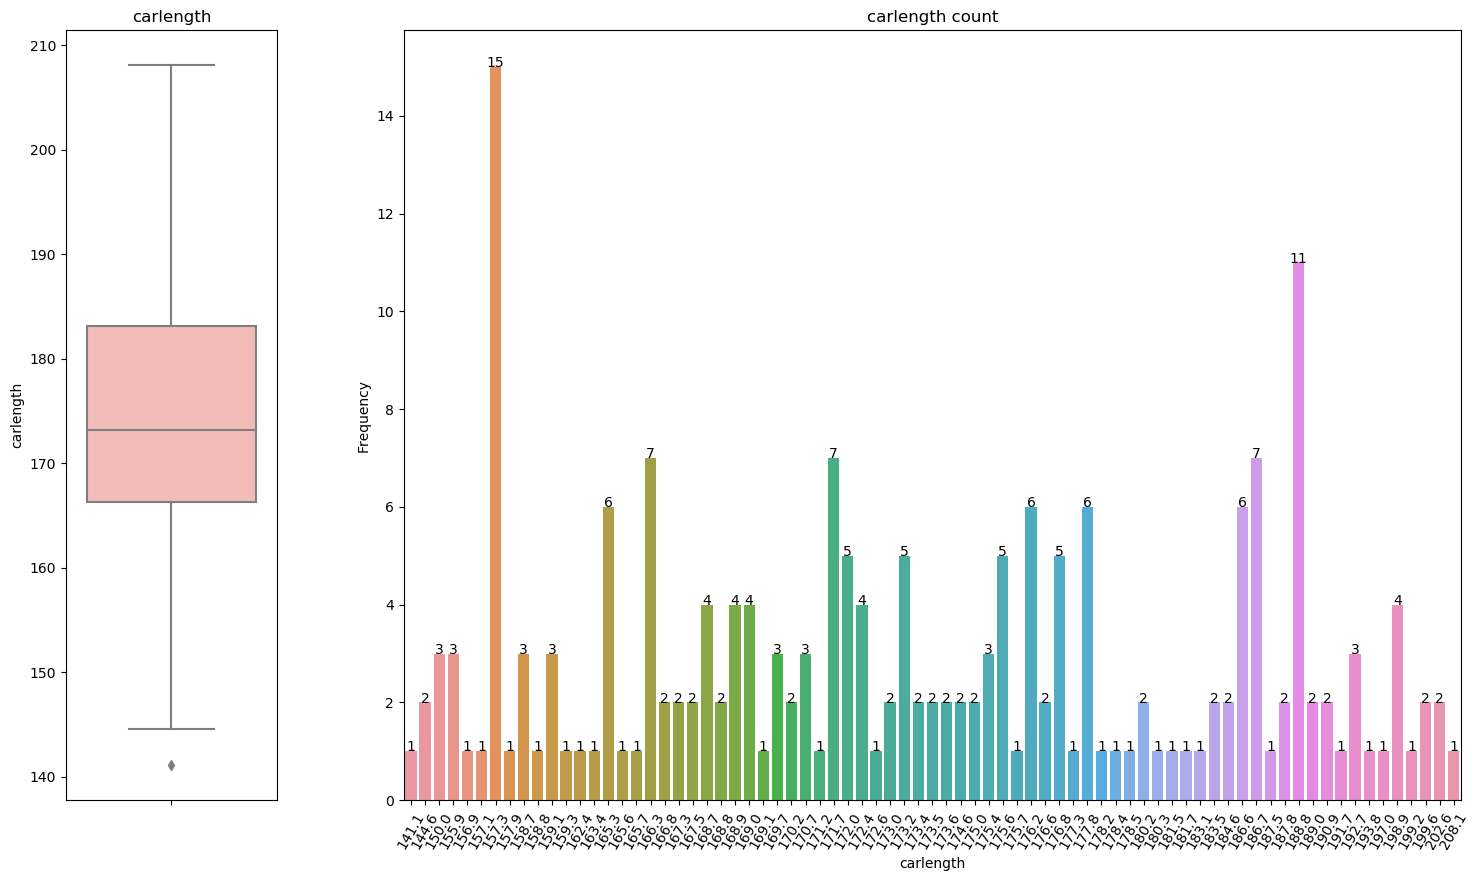

In carlength : 157.3 has high frequency. There is one outlier as well.


In [33]:
columnName = 'carlength'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
carlen_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(carlen_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In carlength : 157.3 has high frequency. There is one outlier as well.")

#### Analysis of carwidth

Mean of carwidth = 65.91
Median of carwidth = 65.5
Mode of carwidth = 63.8


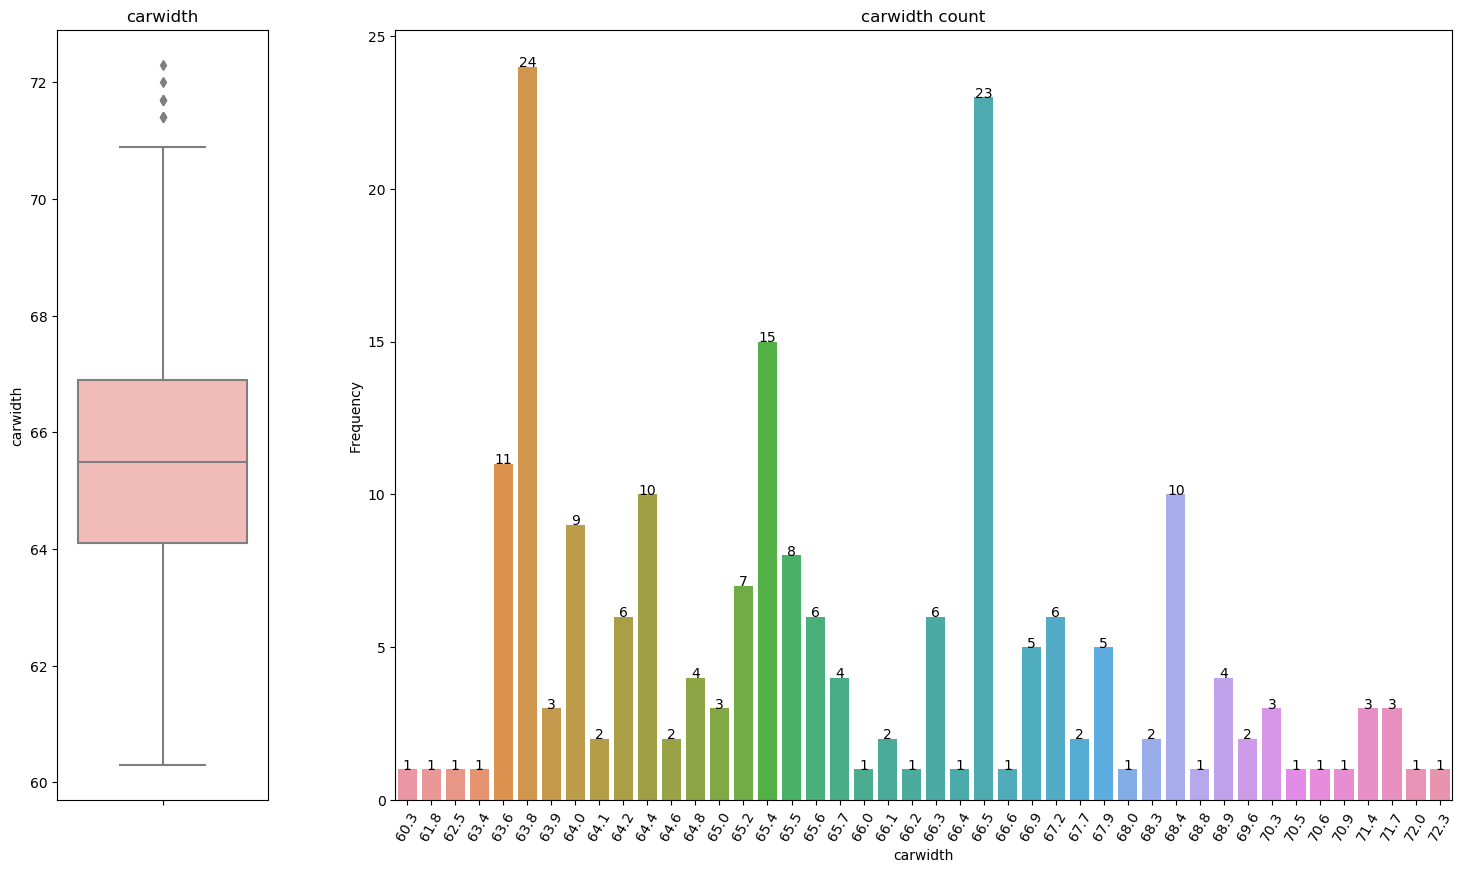

In carwidth : 63.8 has high frequency. There are some outliers as well.


In [34]:
columnName = 'carwidth'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
carwidth_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(carwidth_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In carwidth : 63.8 has high frequency. There are some outliers as well.")

#### Analysis of carheight

Mean of carheight = 53.72
Median of carheight = 54.1
Mode of carheight = 50.8


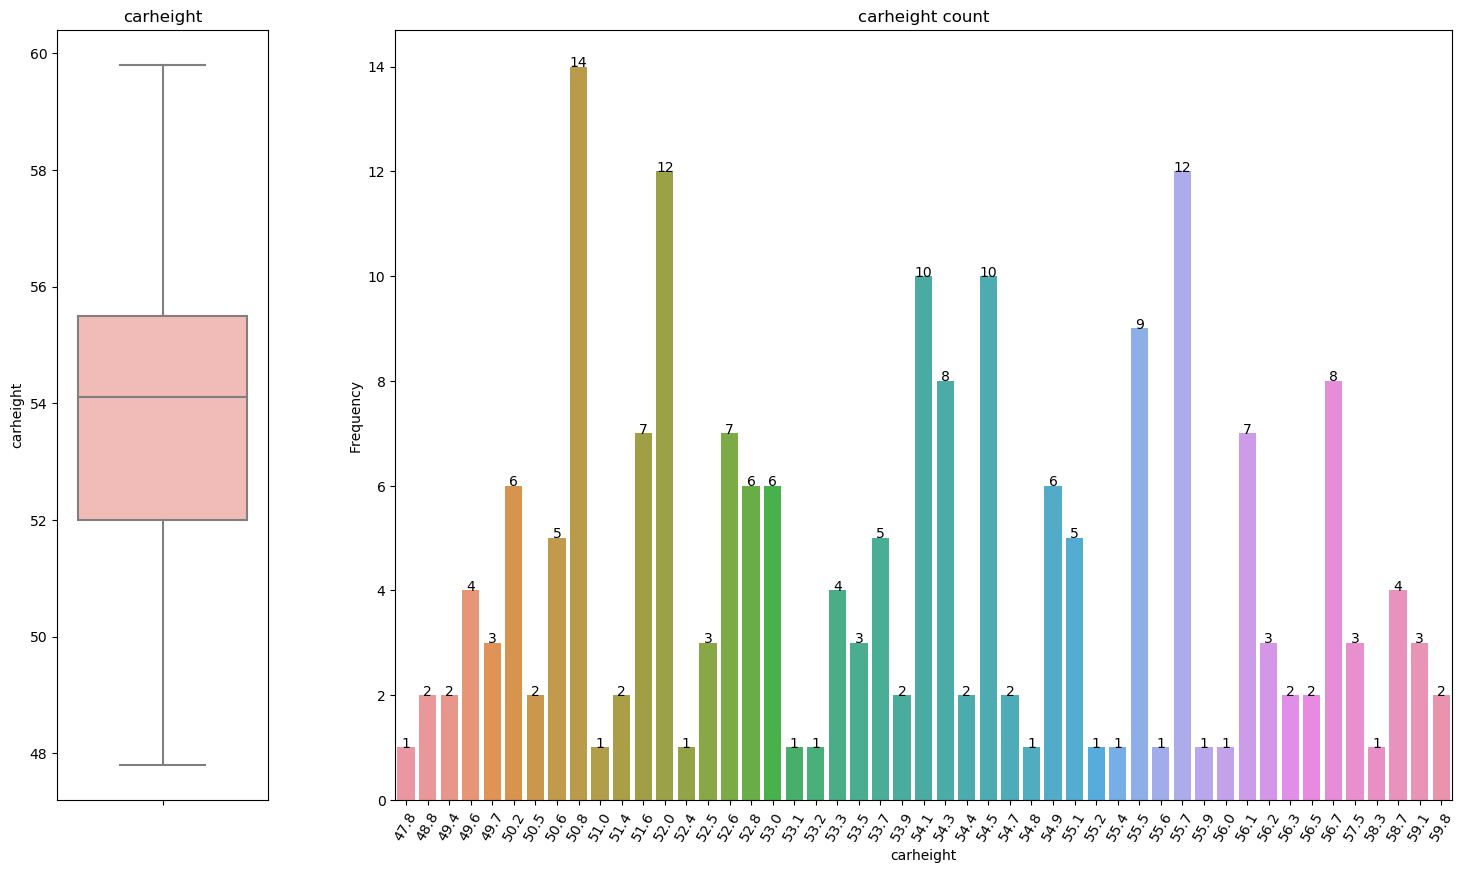

In carheight : 50.8 has high frequency. There is no outlier.


In [35]:
columnName = 'carheight'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
carheight_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(carheight_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In carheight : 50.8 has high frequency. There is no outlier.")

#### Analysis of  curbweight

Mean of curbweight =  2555.57
Median of curbweight =  2414.0
Mode of curbweight =  2385


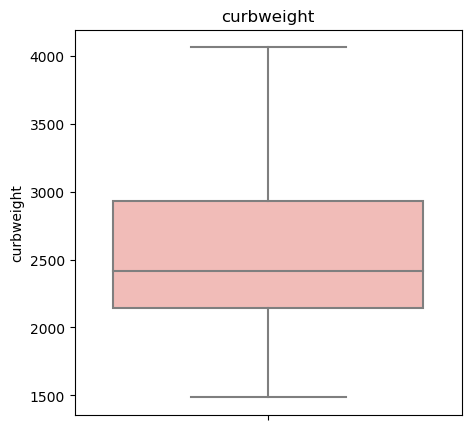

In curbweight: There is no outlier.


In [36]:
columnName = 'curbweight'
print('Mean of ' + columnName + ' = ', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_df[columnName].median())
print('Mode of ' + columnName + ' = ', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(5,5))
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)
plt.show()

print("In curbweight: There is no outlier.")

#### Analysis of enginesize

Mean of enginesize = 126.91
Median of enginesize = 120.0
Mode of enginesize = 92 122


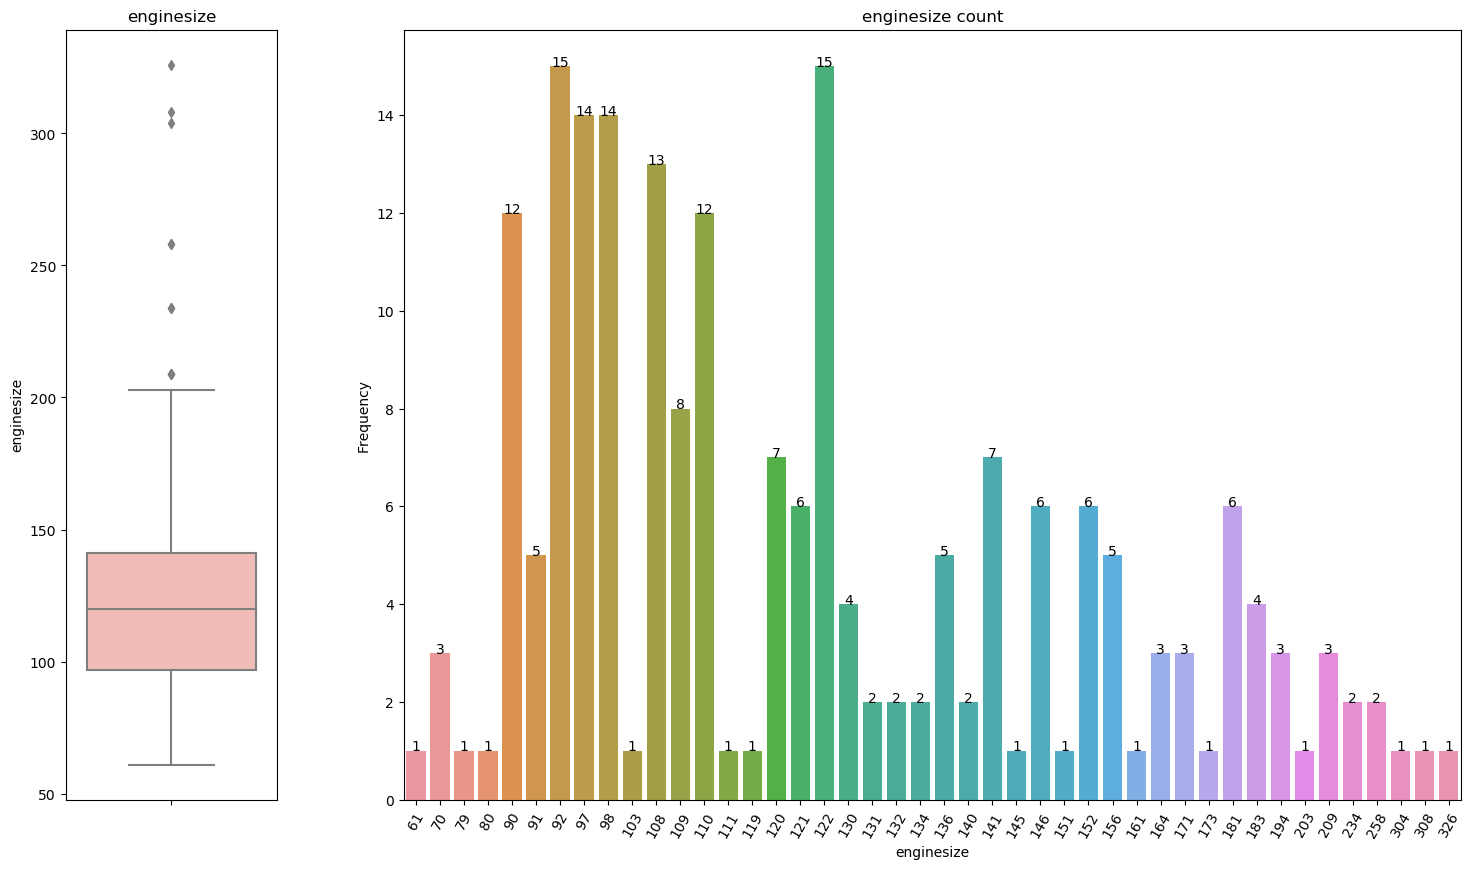

In enginesize : 92 & 122 have high frequencies. There are some outliers as well.


In [37]:
columnName = 'enginesize'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0], master_df[columnName].mode()[1])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
enginesize_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(enginesize_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In enginesize : 92 & 122 have high frequencies. There are some outliers as well.")

#### Analysis of boreratio

Mean of boreratio = 3.33
Median of boreratio = 3.31
Mode of boreratio = 3.62


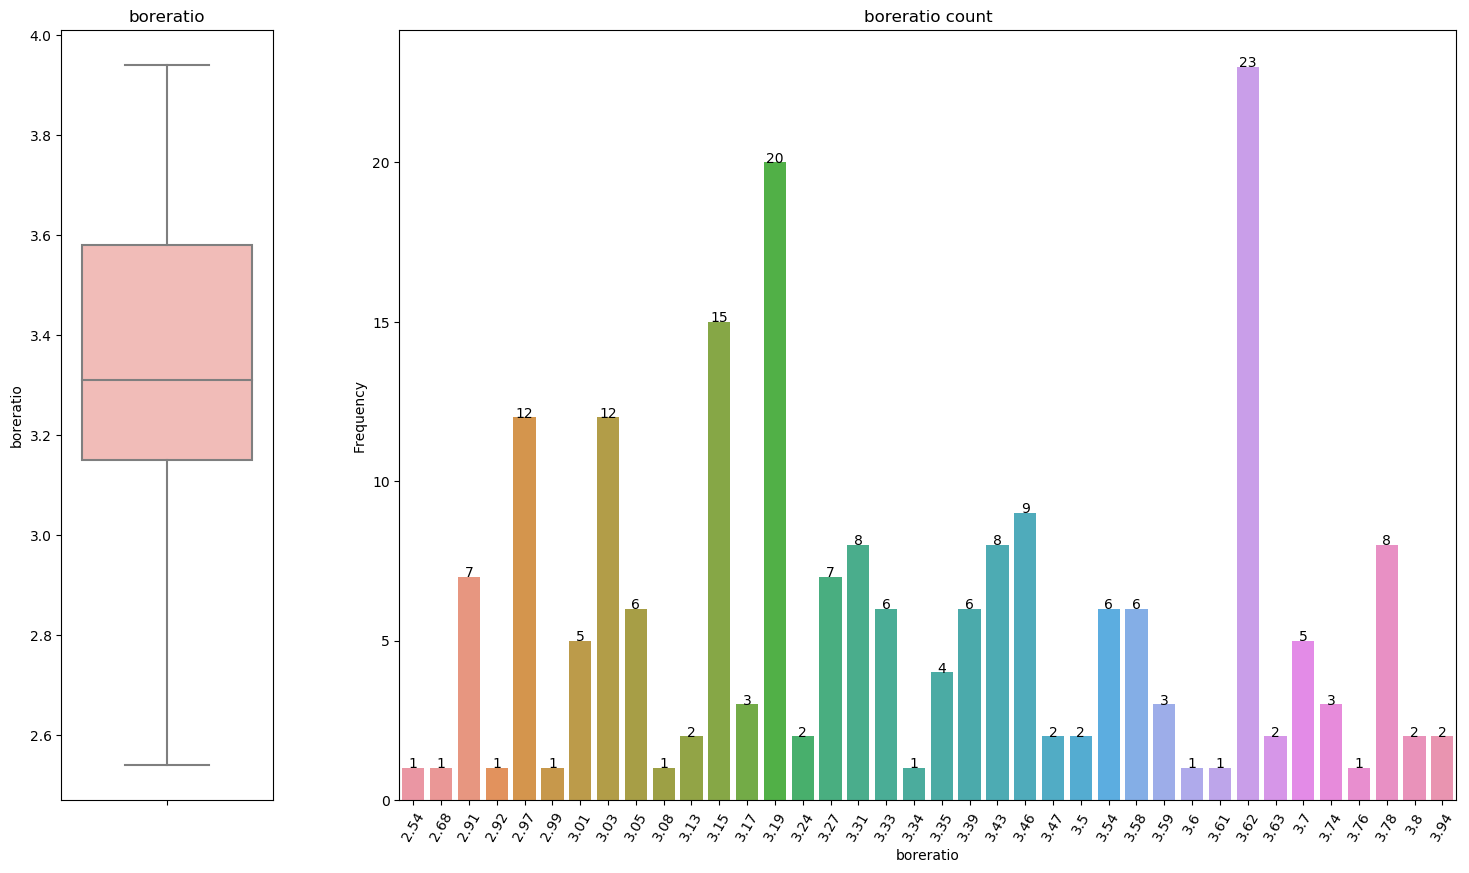

In boreratio : 3.62 has high frequency. There is no outlier.


In [38]:
columnName = 'boreratio'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
boreratio_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(boreratio_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In boreratio : 3.62 has high frequency. There is no outlier.")

#### Analysis of stroke

Mean of stroke = 3.26
Median of stroke = 3.29
Mode of stroke = 3.4


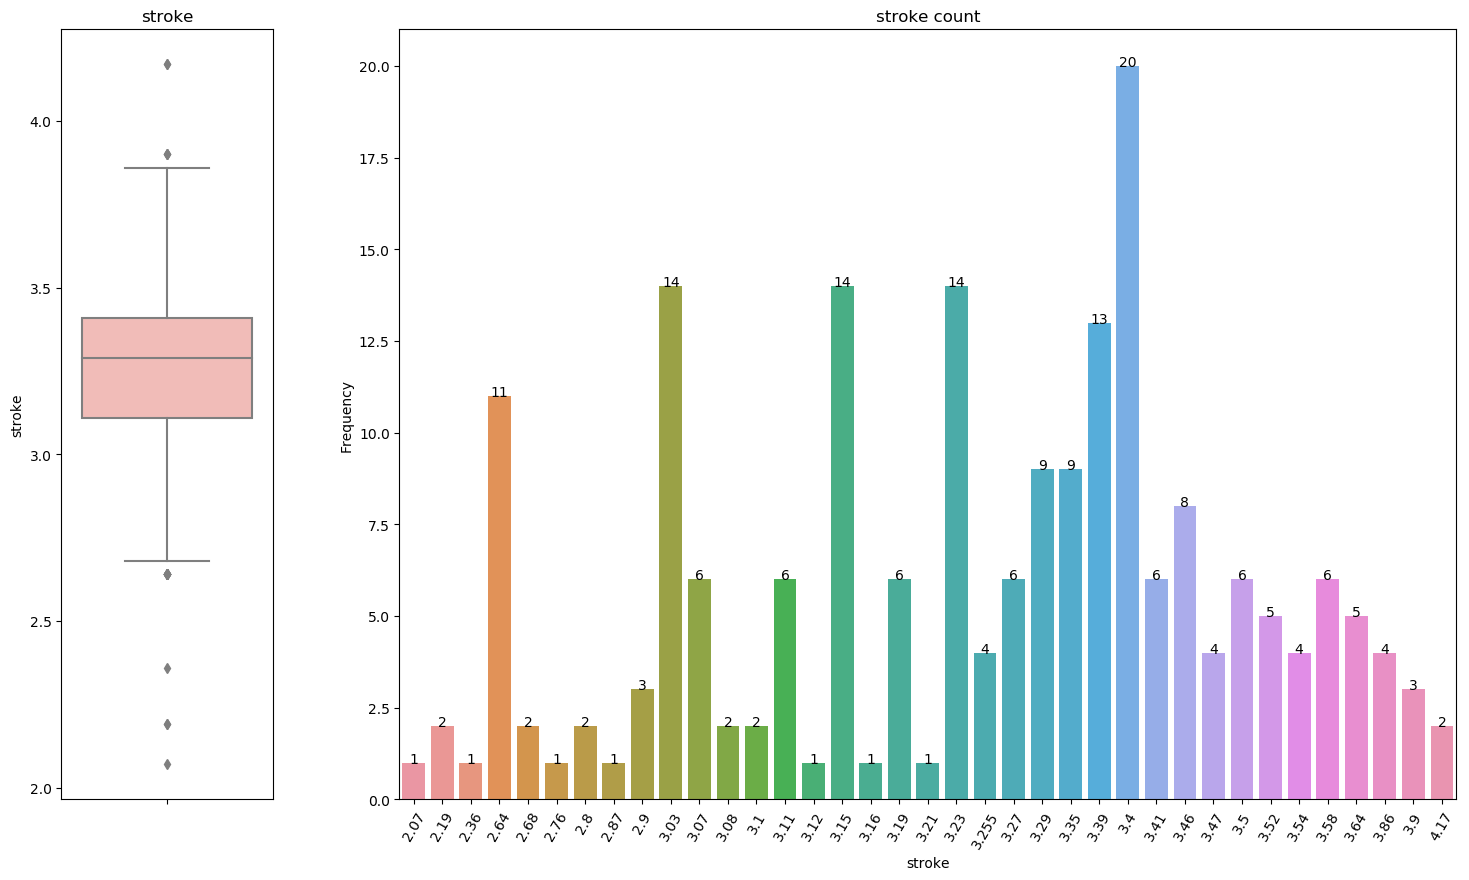

In stroke : 3.4 has high frequency. There are some outliers as well.


In [39]:
columnName = 'stroke'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
stroke_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(stroke_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In stroke : 3.4 has high frequency. There are some outliers as well.")

#### Analysis of compressionratio

Mean of compressionratio = 10.14
Median of compressionratio = 9.0
Mode of compressionratio = 9.0


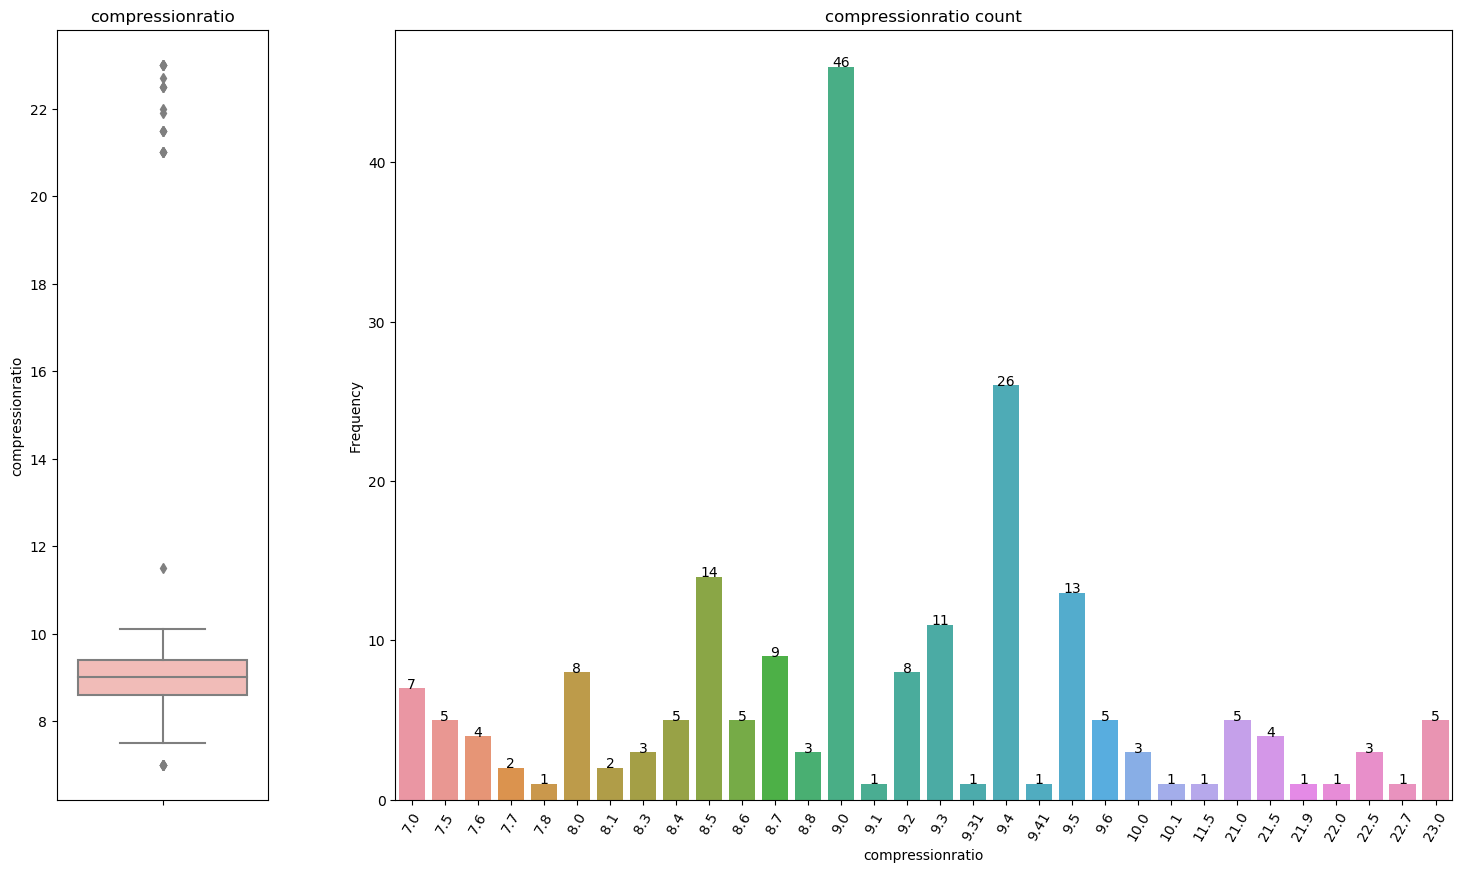

In compressionratio : 9.0 has high frequency. There are some outliers as well.


In [40]:
columnName = 'compressionratio'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
compression_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(compression_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In compressionratio : 9.0 has high frequency. There are some outliers as well.")

#### Analysis of horsepower

Mean of horsepower = 104.12
Median of horsepower = 95.0
Mode of horsepower = 68


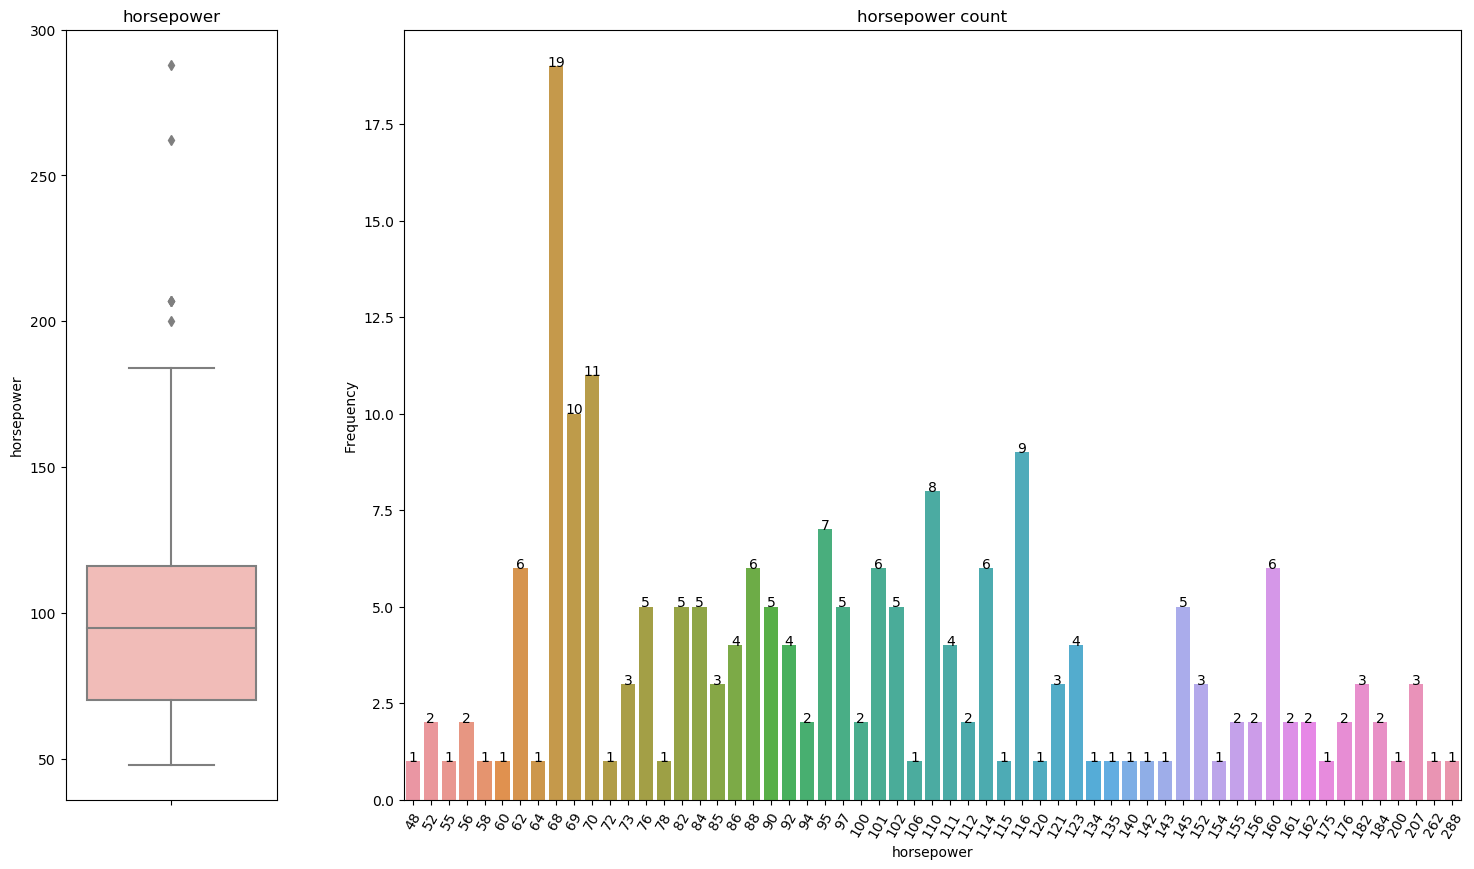

In horsepower : 68 has high frequency. There are some outliers as well.


In [41]:
columnName = 'horsepower'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
horsepower_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(horsepower_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In horsepower : 68 has high frequency. There are some outliers as well.")

#### Analysis of peakrpm

Mean of peakrpm = 5125.12
Median of peakrpm = 5200.0
Mode of peakrpm = 5500


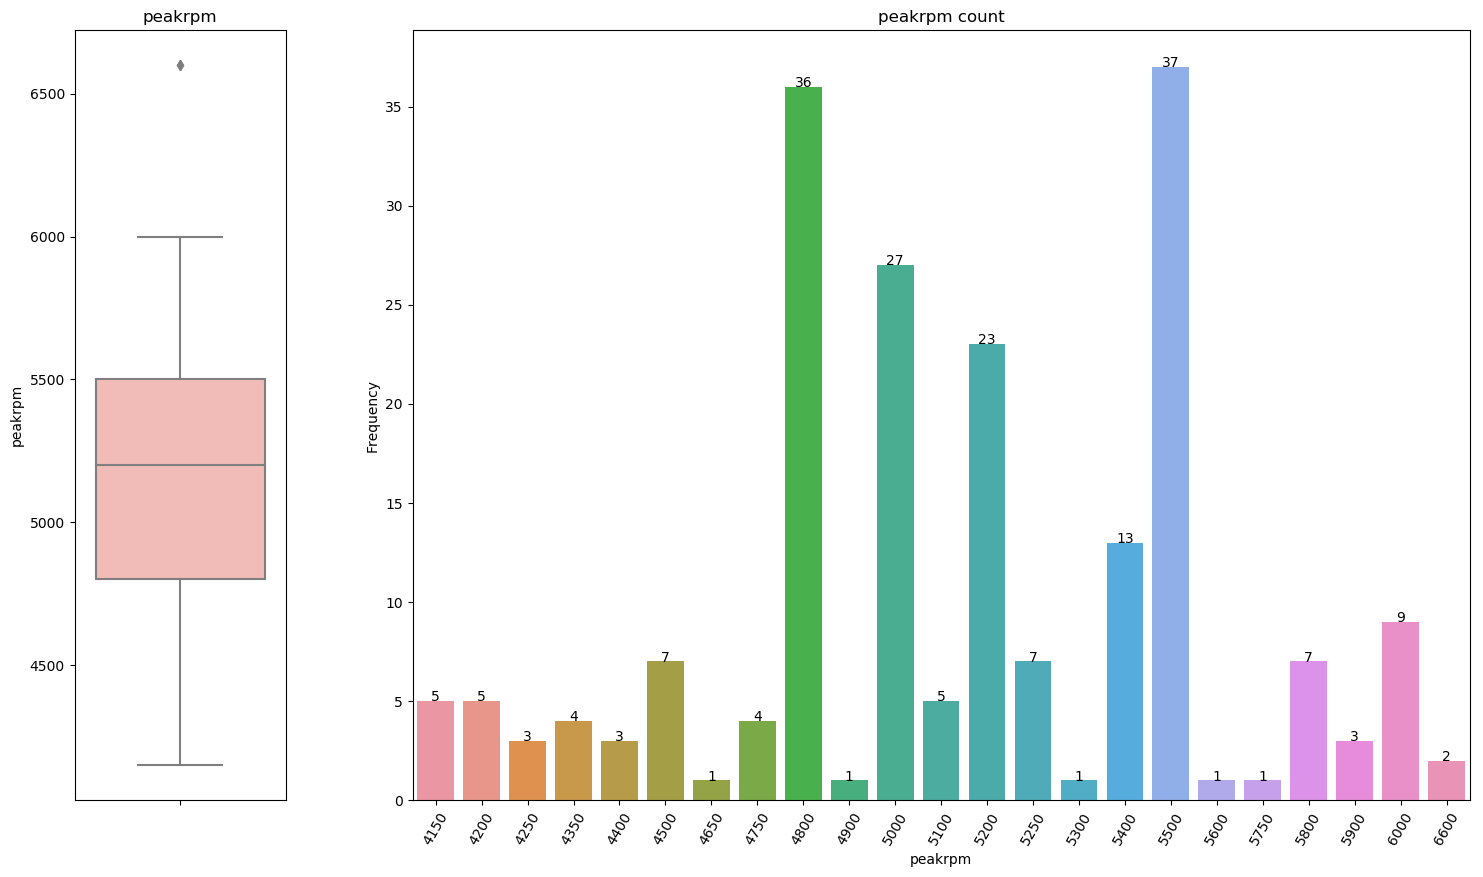

In peakrpm : 55000 has high frequency. There is one outlier as well.


In [42]:
columnName = 'peakrpm'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
peakrpm_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(peakrpm_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In peakrpm : 55000 has high frequency. There is one outlier as well.")

#### Analysis of citympg

Mean of citympg = 25.22
Median of citympg = 24.0
Mode of citympg = 31


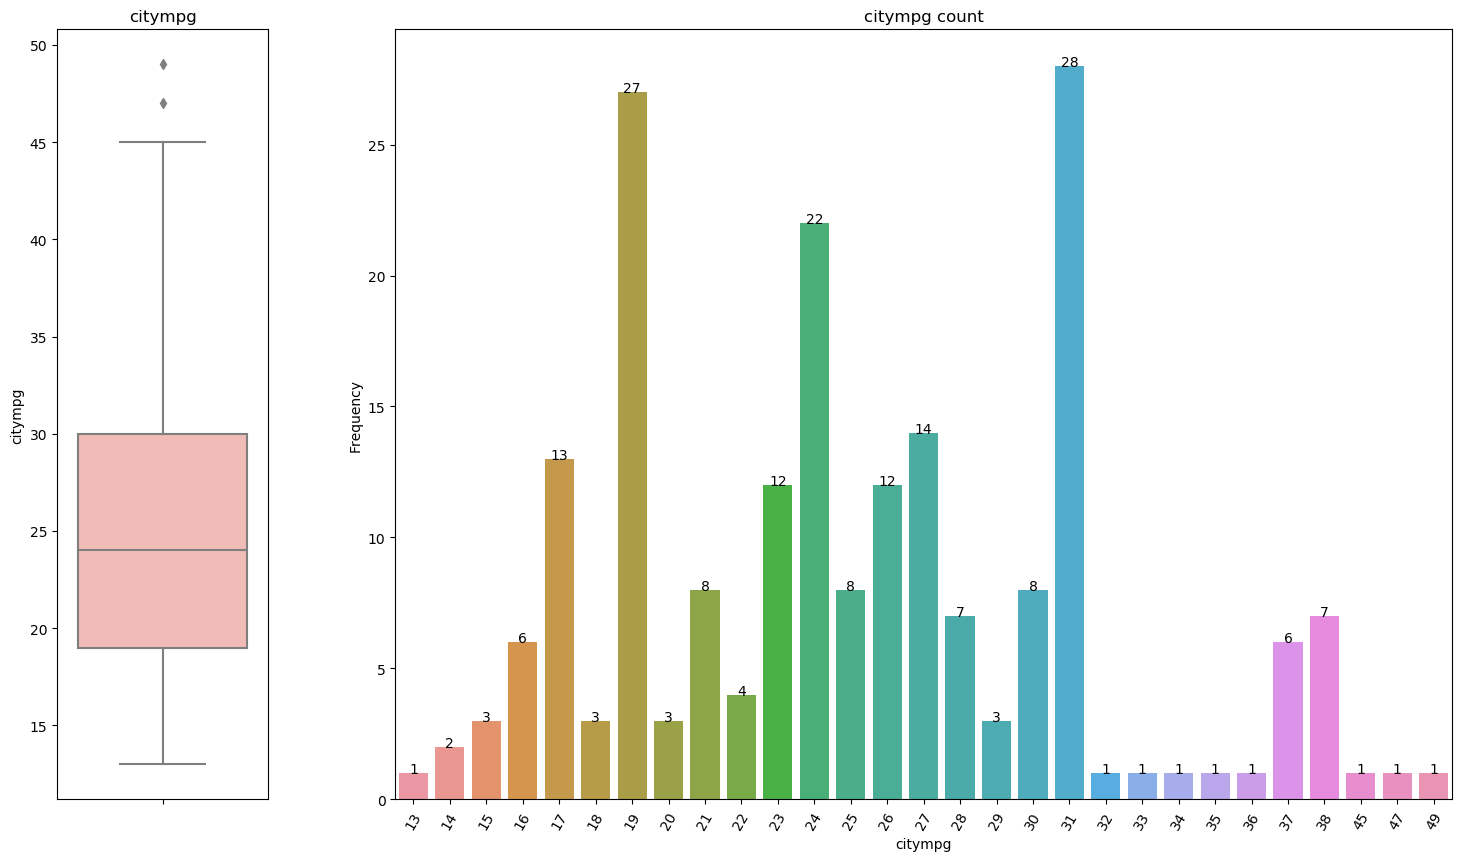

In citympg : 31 has high frequency. There are some outliers as well.


In [43]:
columnName = 'citympg'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
citympg_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(citympg_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In citympg : 31 has high frequency. There are some outliers as well.")

#### Analysis of highwaympg

Mean of highwaympg = 30.75
Median of highwaympg = 30.0
Mode of highwaympg = 25


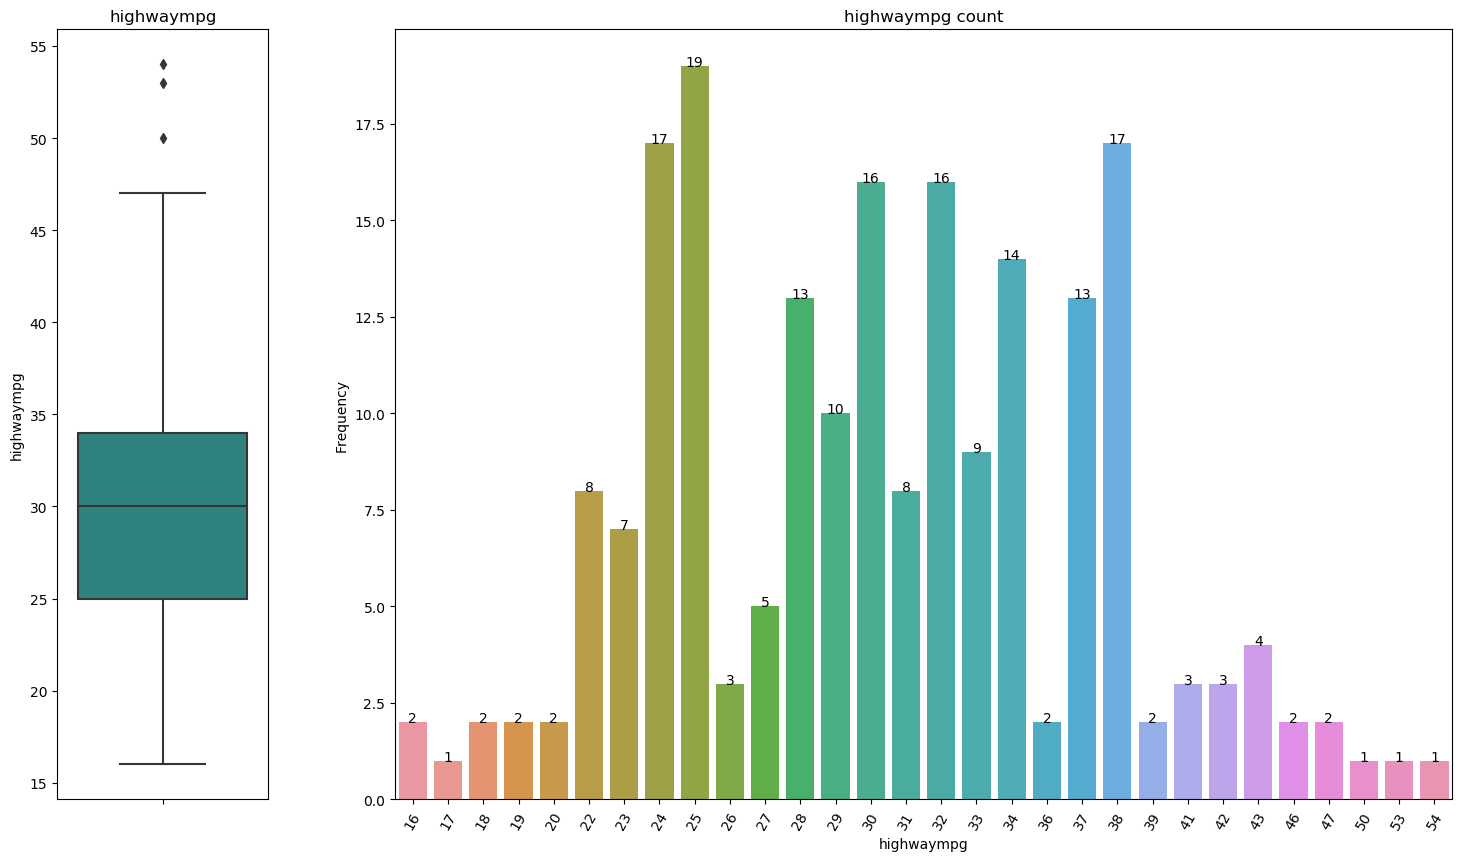

In highwaympg : 25 has high frequency. There are some outliers as well.


In [44]:
columnName = 'highwaympg'
print('Mean of ' + columnName + ' =', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' =', master_df[columnName].median())
print('Mode of ' + columnName + ' =', master_df[columnName].mode()[0])

# Plotting the distribution plot
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_df[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
highwaympg_freq = master_df.groupby(master_df[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(highwaympg_freq, columnName, 'Frequency', gs[1], columnName + ' count', columnName, 
                                'Frequency', 60, None, '', True, True)

print("In highwaympg : 25 has high frequency. There are some outliers as well.")

#### Analysis of price

Mean of price =  13276.71
Median of price =  10295.0
Mode of price =  5572.0


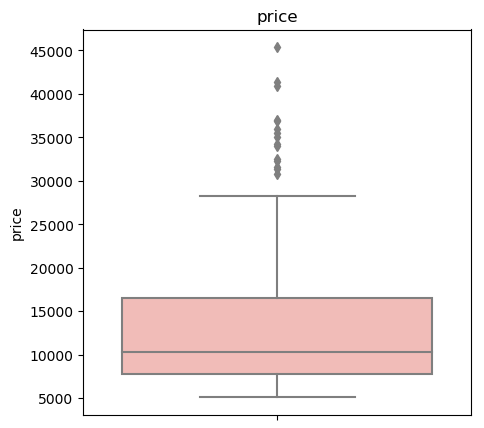


There is a huge variation in pricings and most common pricings are shown in the mode of price above.


In [45]:
columnName = 'price'
print('Mean of ' + columnName + ' = ', round(master_df[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_df[columnName].median())
print('Mode of ' + columnName + ' = ', master_df[columnName].mode()[0])

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(5,5))
sns.boxplot(y=master_df[columnName], palette='Pastel1')
plt.ylabel(columnName)
plt.title(columnName)
plt.show()

print('\nThere is a huge variation in pricings and most common pricings are shown in the mode of price above.')

#### Analysis of CompanyName

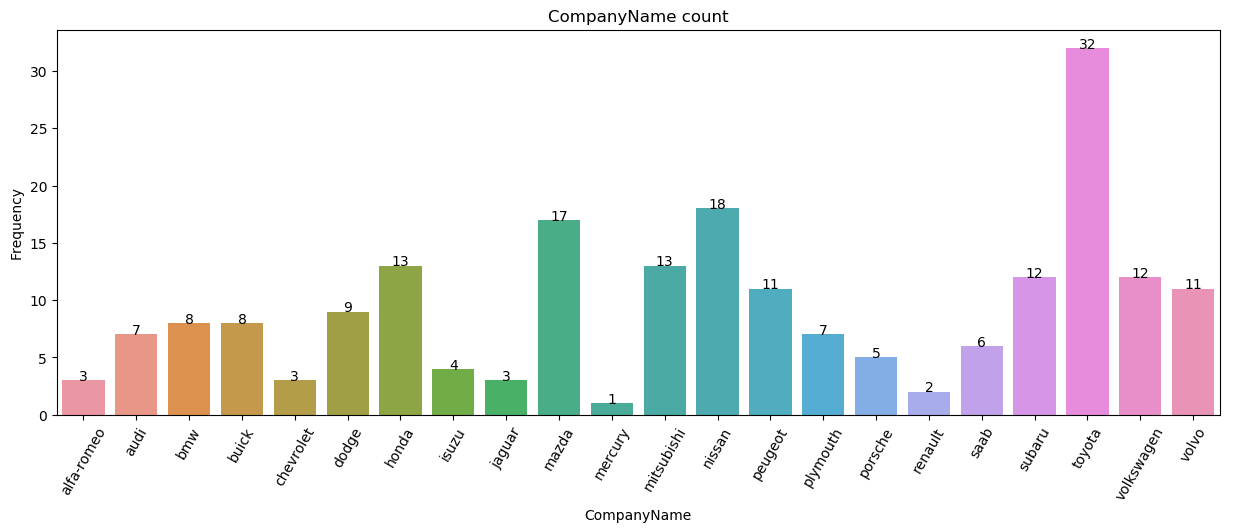

In CompanyName : 'toyota' been used more. 
We can remove CompanyName:mercury, it has very low frequency in comparison to others, would not contribute much in analysis.


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'twelve',
 'fuelsystem': 'spfi',
 'CompanyName': 'mercury'}

In [46]:
# Plot frequency bar chart  
company_freq = master_df.groupby(master_df['CompanyName']).size().reset_index(name='Frequency')

draw_bar_chart(company_freq,'CompanyName','Frequency',15,5,'CompanyName count','CompanyName','Frequency',60,None,'',True)

print("In CompanyName : 'toyota' been used more.",
      '\nWe can remove CompanyName:mercury, it has very low frequency in comparison to others, would not '
      'contribute much in analysis.')

# These columns can be removed while dummy variable creation
remove_for_dummy['CompanyName'] = 'mercury'
remove_for_dummy

## Segmented Univariate Analysis

#### Check if there is any relation between fueltype and fuelsystem

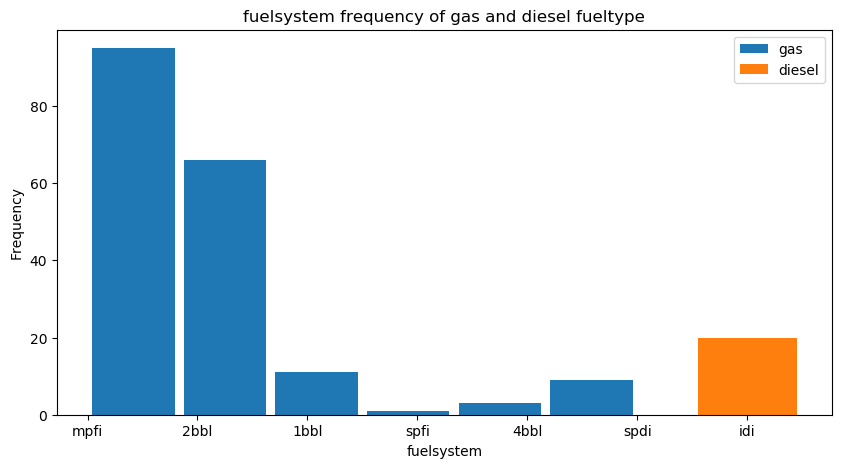

gas fuel systems = ['mpfi' '2bbl' '1bbl' 'spfi' '4bbl' 'spdi']
diesel fuel systems = ['idi']

Both fueltype has different fuelsystem so drop fueltype variable, as one is enough to distinguish.



In [47]:
# Plot Frequency Chart
gas_fuelsystem = master_df[master_df.fueltype == 'gas'].fuelsystem
diesel_fuelsystem = master_df[master_df.fueltype == 'diesel'].fuelsystem

plt.rcdefaults() # Restore the rc params from internal defaults
plt.figure(figsize=(10,5))

plt.hist([gas_fuelsystem], bins=6, rwidth=0.90)
plt.hist([diesel_fuelsystem], bins=1, rwidth=0.90)

plt.xlabel("fuelsystem")
plt.ylabel("Frequency")

plt.legend(master_df.fueltype.unique())
plt.xticks(rotation=0)

plt.title('fuelsystem frequency of gas and diesel fueltype')

plt.show()

print('gas fuel systems =', gas_fuelsystem.unique())
print('diesel fuel systems =', diesel_fuelsystem.unique())

print("\nBoth fueltype has different fuelsystem so drop fueltype variable, as one is enough to distinguish.\n")

#### Dropping fueltype

In [48]:
try:
    print('Dropping fueltype column')
    master_df.drop('fueltype', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping fueltype column


## Bivariate Analysis

#### Build a correlation plot for all numerical variables

In [49]:
df_numeric = pd.DataFrame(master_df.select_dtypes(exclude=['object']))

# Correlation Matrix
corr = round(df_numeric.corr(),2)
corr.style.background_gradient()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,-0.53,1,0.87,0.8,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.7,0.68
carwidth,-0.23,0.8,0.84,1,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1,0.3,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.3,1,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.8,0.84
enginesize,-0.11,0.57,0.68,0.74,0.07,0.85,1,0.58,0.2,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,0.16,0.13,0.18,-0.06,0.17,0.2,-0.06,1,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1,-0.2,-0.44,0.32,0.27,0.07


### price has high correlation with enginesize, curbweight, horsepower and carwidth.

#### Visualise pricing of various car companies

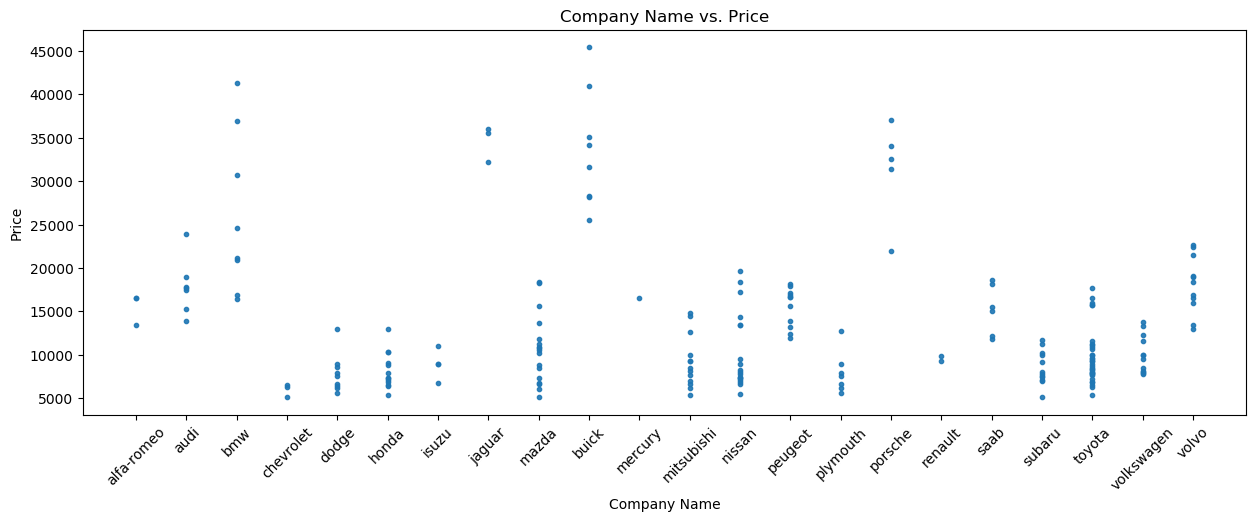

Buick which is a luxuary car maker has the highest pricings followed by BMW, Porsche and Jaguar
 
This indicates that the BRAND VALUE is a major factor in pricing.


In [50]:
# Scatter Plot
draw_scatter_plot(master_df, 'CompanyName', 'price', 'Company Name', 'Price', 15, 5, 45, 'Company Name vs. Price', 0.9)

print('Buick which is a luxuary car maker has the highest pricings followed by BMW, Porsche and Jaguar\n',
     '\nThis indicates that the BRAND VALUE is a major factor in pricing.')

#### Visualise symboling vs price

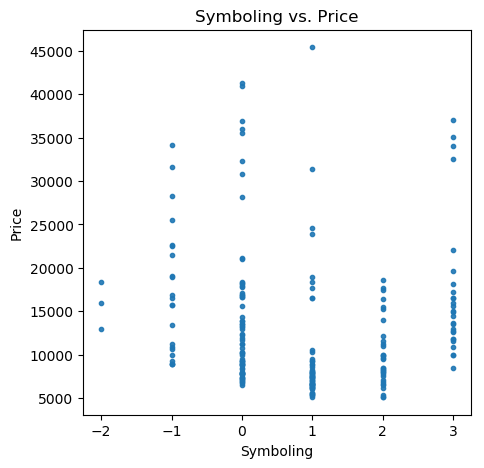

Insurance risk rating 1 has highest pricing.


In [51]:
# Scatter Plot 
draw_scatter_plot(master_df, "symboling", "price", 'Symboling', 'Price', 5, 5, 0, 'Symboling vs. Price', 0.9)

print('Insurance risk rating 1 has highest pricing.')

#### Visualise aspiration vs price

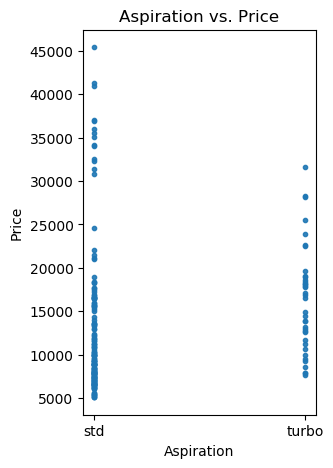

There is significant difference in price range for both aspiration types.


In [52]:
# Scatter Plot 
draw_scatter_plot(master_df, "aspiration", "price", 'Aspiration', 'Price', 3, 5, 0, 'Aspiration vs. Price', 0.9)

print('There is significant difference in price range for both aspiration types.')

#### Visualise doornumber vs price

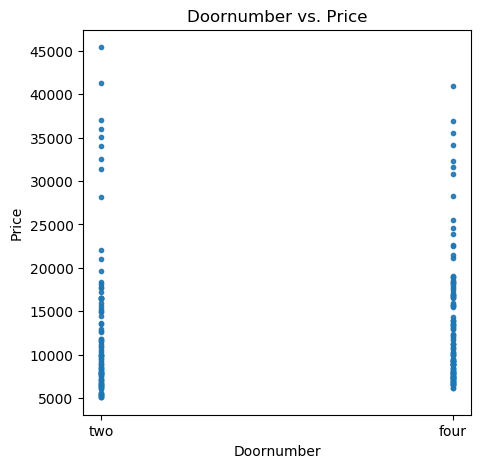

There is not much difference in price ranges for both doornumbers.


In [53]:
# Scatter Plot 
draw_scatter_plot(master_df, "doornumber", "price", 'Doornumber', 'Price', 5, 5, 0, 'Doornumber vs. Price', 0.9)

print('There is not much difference in price ranges for both doornumbers.')

#### Visualise carbody vs price

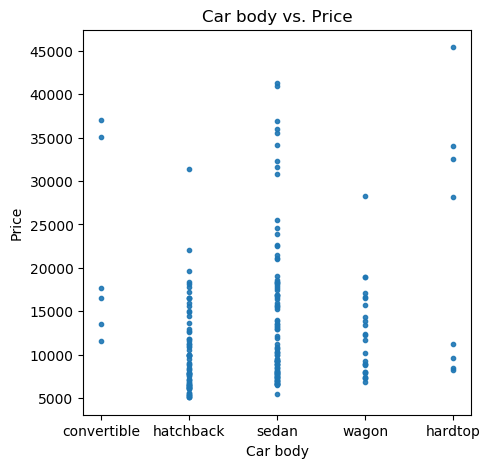

There is significant variation in price ranges for all body types.


In [54]:
# Scatter Plot 
draw_scatter_plot(master_df, "carbody", "price", 'Car body', 'Price', 5, 5, 0, 'Car body vs. Price', 0.9)

print('There is significant variation in price ranges for all body types.')

#### Visualise drivewheel vs price

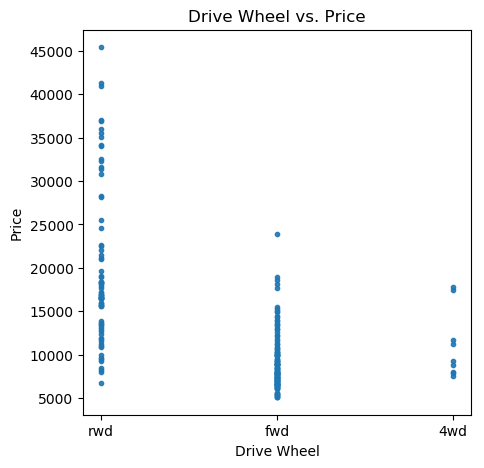

There is significant variation in price ranges for both drivewheel types.


In [55]:
# Scatter Plot 
draw_scatter_plot(master_df, "drivewheel", "price", 'Drive Wheel', 'Price', 5, 5, 0, 'Drive Wheel vs. Price', 0.9)

print('There is significant variation in price ranges for both drivewheel types.')

#### Visualise enginelocation vs price

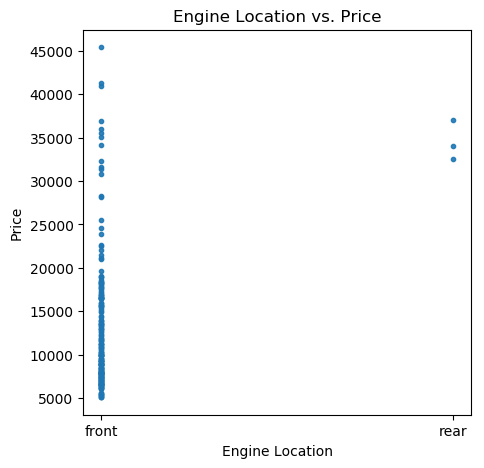

Engine location 'front' is having more numbers plus wide range of pricing.


In [56]:
# Scatter Plot
draw_scatter_plot(master_df, "enginelocation", "price", 'Engine Location', 'Price', 5, 5, 0, 'Engine Location vs. Price', 0.9)

print("Engine location 'front' is having more numbers plus wide range of pricing.")

#### Visualise wheelbase vs price

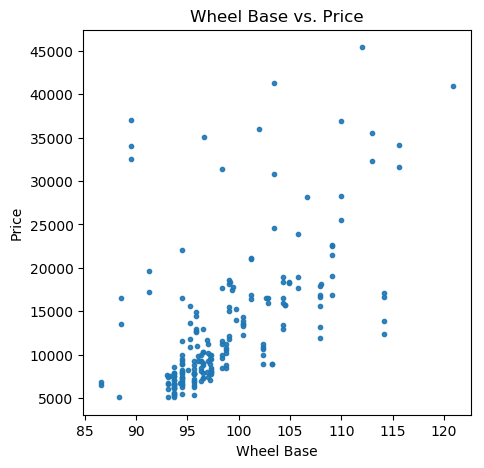

There are clearly some outliers in wheelbase. We had seen in boxplot earlier as well. 
Lets remove the outliers below 5% and check for further analysis.


In [57]:
# Scatter Plot
draw_scatter_plot(master_df, "wheelbase", "price", 'Wheel Base', 'Price', 5, 5, 0, 'Wheel Base vs. Price', 0.9)

print('There are clearly some outliers in wheelbase. We had seen in boxplot earlier as well.',
      '\nLets remove the outliers below 5% and check for further analysis.')

#### Removing outliers in wheel base

In [58]:
master_df = master_df[master_df.wheelbase >= master_df.wheelbase.quantile(.05)]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 2 to 204
Data columns (total 24 columns):
symboling           194 non-null int64
aspiration          194 non-null object
doornumber          194 non-null object
carbody             194 non-null object
drivewheel          194 non-null object
enginelocation      194 non-null object
wheelbase           194 non-null float64
carlength           194 non-null float64
carwidth            194 non-null float64
carheight           194 non-null float64
curbweight          194 non-null int64
enginetype          194 non-null object
cylindernumber      194 non-null object
enginesize          194 non-null int64
fuelsystem          194 non-null object
boreratio           194 non-null float64
stroke              194 non-null float64
compressionratio    194 non-null float64
horsepower          194 non-null int64
peakrpm             194 non-null int64
citympg             194 non-null int64
highwaympg          194 non-null int64
price          

#### Visualise wheelbase vs price again

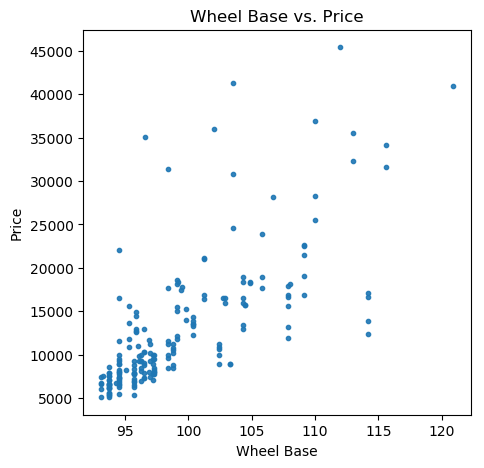


wheelbase and price are somewhat correlated as wheelbase increases, price also increases. 
As checked earlier, correlation was 0.58.



In [59]:
draw_scatter_plot(master_df, "wheelbase", "price", 'Wheel Base', 'Price', 5, 5, 0, 'Wheel Base vs. Price', 0.9)

print('\nwheelbase and price are somewhat correlated as wheelbase increases, price also increases.', 
      '\nAs checked earlier, correlation was 0.58.\n')

#### Visualise carlength vs price

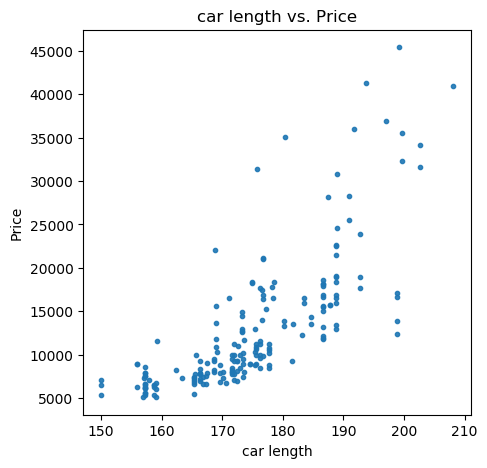

carlength and price are somewhat correlated and as carlength increases, price also increases. 
As checked earlier, correlation was 0.68.



In [60]:
# Scatter Plot
draw_scatter_plot(master_df, "carlength", "price", 'car length', 'Price', 5, 5, 0, 'car length vs. Price', 0.9)

print('carlength and price are somewhat correlated and as carlength increases, price also increases.', 
      '\nAs checked earlier, correlation was 0.68.\n')

#### Visualise carwidth vs price

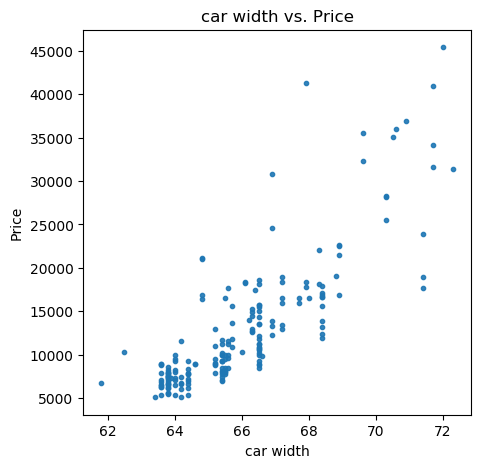

carwidth and price are highly correlated and as width increases price also increases. 
As checked earlier, correlation was 0.76.



In [61]:
# Scatter Plot 
draw_scatter_plot(master_df, "carwidth", "price", 'car width', 'Price', 5, 5, 0, 'car width vs. Price', 0.9)

print('carwidth and price are highly correlated and as width increases price also increases.', 
      '\nAs checked earlier, correlation was 0.76.\n')

#### Visualise carheight vs price

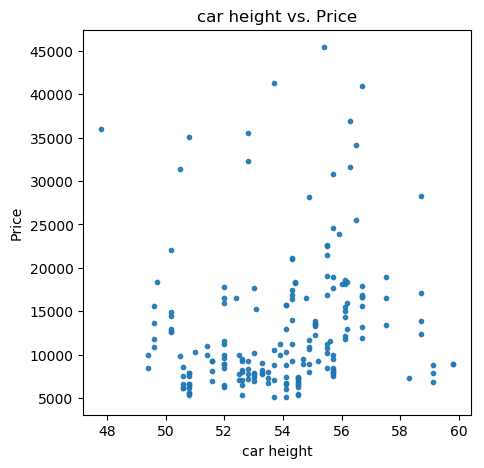

carheight and price are not having linear relation and not correlated. 
As checked earlier, correlation was 0.12 which is negligible.



In [62]:
# Scatter Plot 
draw_scatter_plot(master_df, "carheight", "price", 'car height', 'Price', 5, 5, 0, 'car height vs. Price', 0.9)

print('carheight and price are not having linear relation and not correlated.', 
      '\nAs checked earlier, correlation was 0.12 which is negligible.\n')

#### Dropping carheight

In [63]:
# Dropping carheight
try:
    print('Dropping carheight column')
    master_df.drop('carheight', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping carheight column


#### Visualise curbweight vs price

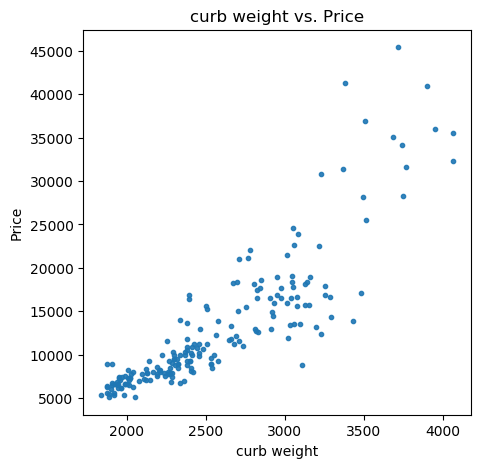

curbweight and prices are highly positively correlated. 
As checked earlier, correlation was 0.84.



In [64]:
# Scatter Plot
draw_scatter_plot(master_df, "curbweight", "price", 'curb weight', 'Price', 5, 5, 0, 'curb weight vs. Price', 0.9)

print('curbweight and prices are highly positively correlated.', '\nAs checked earlier, correlation was 0.84.\n')

#### Visualise enginetype vs price

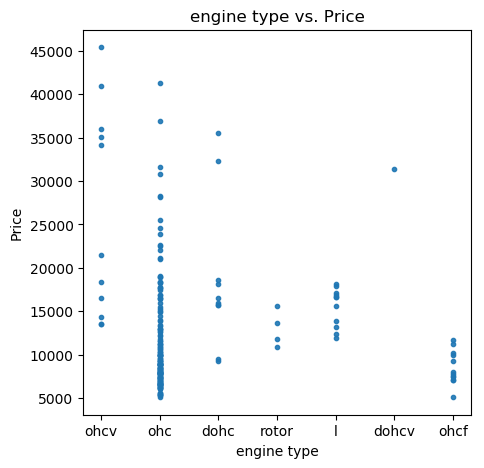

There is significant variation in price ranges for all engine types.



In [65]:
# Scatter Plot
draw_scatter_plot(master_df, "enginetype", "price", 'engine type', 'Price', 5, 5, 0, 'engine type vs. Price', 0.9)

print('There is significant variation in price ranges for all engine types.\n')

#### Visualise cylindernumber vs price

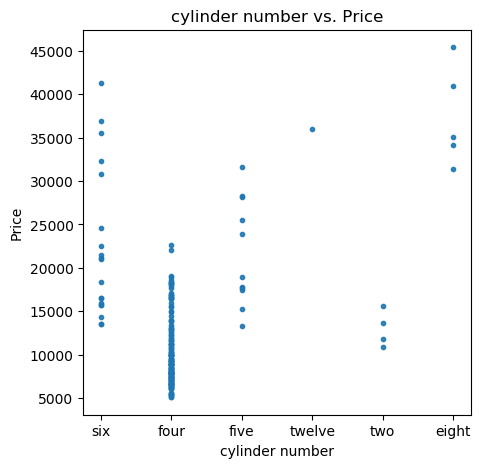

There is significant variation in price ranges for all cylinder numbers.



In [66]:
# Scatter Plot
draw_scatter_plot(master_df, "cylindernumber", "price", 'cylinder number', 'Price',
                  5, 5, 0, 'cylinder number vs. Price', 0.9)

print('There is significant variation in price ranges for all cylinder numbers.\n')

#### Visualise enginesize vs price

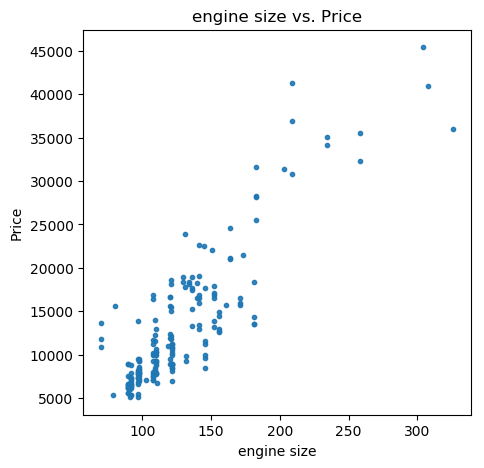

There are some outliers in the enginesize which will be removed for further analysis. 
We had seen in boxplot earlier as well.


In [67]:
# Scatter Plot
draw_scatter_plot(master_df, "enginesize", "price", 'engine size', 'Price', 5, 5, 0, 'engine size vs. Price', 0.9)

print('There are some outliers in the enginesize which will be removed for further analysis.',
      '\nWe had seen in boxplot earlier as well.')

#### Removing outliers in engine size

In [68]:
master_df = master_df[master_df.enginesize >= master_df.enginesize.quantile(.05)]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 2 to 204
Data columns (total 23 columns):
symboling           189 non-null int64
aspiration          189 non-null object
doornumber          189 non-null object
carbody             189 non-null object
drivewheel          189 non-null object
enginelocation      189 non-null object
wheelbase           189 non-null float64
carlength           189 non-null float64
carwidth            189 non-null float64
curbweight          189 non-null int64
enginetype          189 non-null object
cylindernumber      189 non-null object
enginesize          189 non-null int64
fuelsystem          189 non-null object
boreratio           189 non-null float64
stroke              189 non-null float64
compressionratio    189 non-null float64
horsepower          189 non-null int64
peakrpm             189 non-null int64
citympg             189 non-null int64
highwaympg          189 non-null int64
price               189 non-null float64
CompanyName    

#### Visualise enginesize vs price again

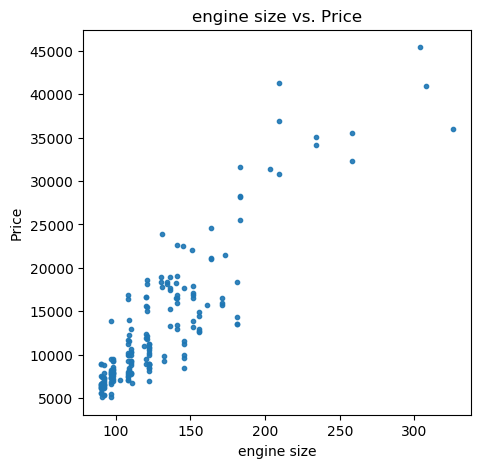

There is high positive correlation between enginesize and price. 
As checked earlier, correlation was 0.87.



In [69]:
draw_scatter_plot(master_df, "enginesize", "price", 'engine size', 'Price', 5, 5, 0, 'engine size vs. Price', 0.9)

print('There is high positive correlation between enginesize and price.', '\nAs checked earlier, correlation was 0.87.\n')

#### Visualise fuelsystem vs price

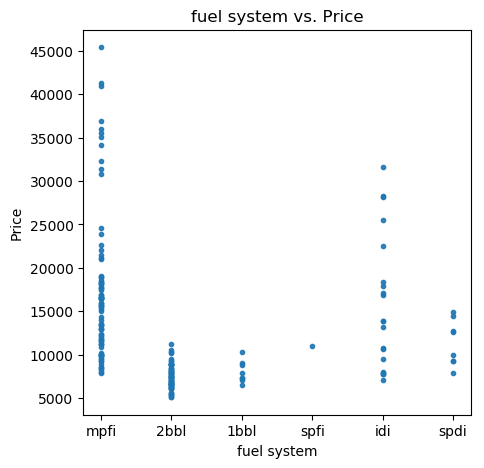

There is significant variation in price ranges for all fuel systems.



In [70]:
# Scatter Plot
draw_scatter_plot(master_df, "fuelsystem", "price", 'fuel system', 'Price', 5, 5, 0, 'fuel system vs. Price', 0.9)

print('There is significant variation in price ranges for all fuel systems.\n')

#### Visualise boreratio vs price

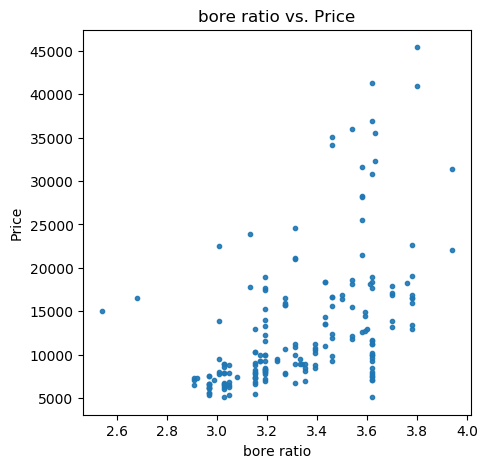

There are some outliers in boreratio, these will be removed for further analysis.


In [71]:
# Scatter Plot
draw_scatter_plot(master_df, "boreratio", "price", 'bore ratio', 'Price', 5, 5, 0, 'bore ratio vs. Price', 0.9)

print('There are some outliers in boreratio, these will be removed for further analysis.')

#### Removing outliers in boreratio

In [72]:
master_df = master_df[master_df.boreratio >= master_df.boreratio.quantile(.05)]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 3 to 204
Data columns (total 23 columns):
symboling           183 non-null int64
aspiration          183 non-null object
doornumber          183 non-null object
carbody             183 non-null object
drivewheel          183 non-null object
enginelocation      183 non-null object
wheelbase           183 non-null float64
carlength           183 non-null float64
carwidth            183 non-null float64
curbweight          183 non-null int64
enginetype          183 non-null object
cylindernumber      183 non-null object
enginesize          183 non-null int64
fuelsystem          183 non-null object
boreratio           183 non-null float64
stroke              183 non-null float64
compressionratio    183 non-null float64
horsepower          183 non-null int64
peakrpm             183 non-null int64
citympg             183 non-null int64
highwaympg          183 non-null int64
price               183 non-null float64
CompanyName    

#### Visualise boreratio vs price again

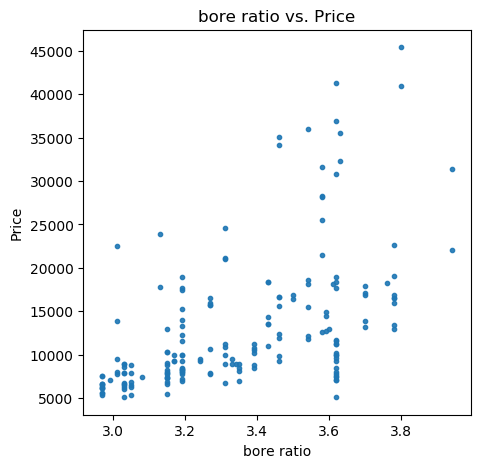

boreration and price are somewhat correlated. 
As check earlier, correlation was 0.55


In [73]:
draw_scatter_plot(master_df, "boreratio", "price", 'bore ratio', 'Price', 5, 5, 0, 'bore ratio vs. Price', 0.9)

print('boreration and price are somewhat correlated.', '\nAs check earlier, correlation was 0.55')

#### Visualise stroke vs price

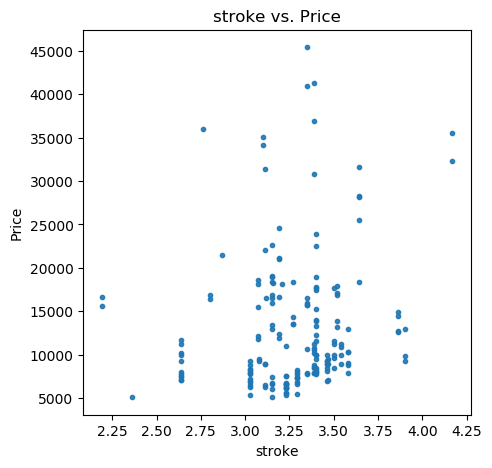

Stroke is not showing a Linear reation with price, this wil be removed from further analysis.


In [74]:
# Scatter Plot
draw_scatter_plot(master_df, "stroke", "price", 'stroke', 'Price', 5, 5, 0, 'stroke vs. Price', 0.9)

print('Stroke is not showing a Linear reation with price, this wil be removed from further analysis.')

#### Dropping stroke

In [75]:
try:
    print('Dropping stroke column')
    master_df.drop('stroke', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping stroke column


#### Visualise compressionratio vs price

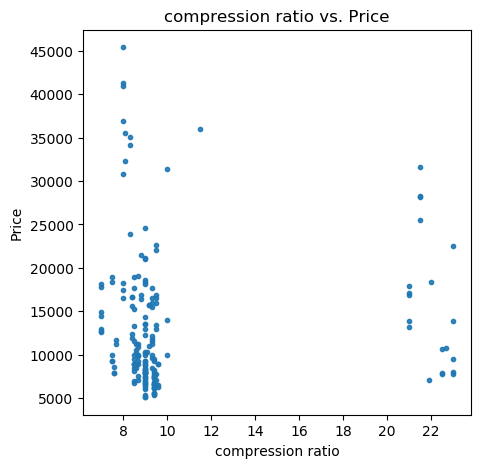

compressionratio is not showing linear relation with price, this will be removed from further analysis.


In [76]:
# Scatter Plot
draw_scatter_plot(master_df, "compressionratio", "price", 'compression ratio', 'Price', 5, 5, 0,
                  'compression ratio vs. Price', 0.9)

print('compressionratio is not showing linear relation with price, this will be removed from further analysis.')

#### Dropping compressionratio

In [77]:
try:
    print('Dropping compressionratio column')
    master_df.drop('compressionratio', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping compressionratio column


#### Visualise horsepower vs price

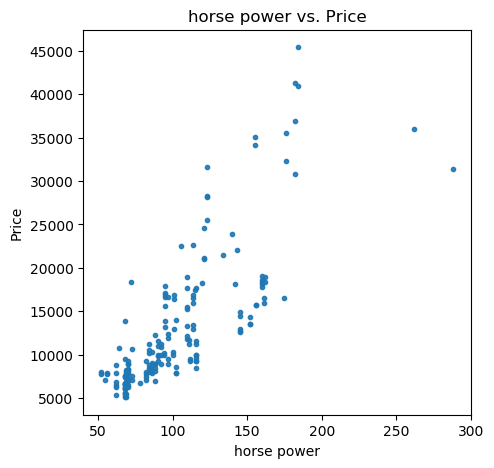

There is high positive correlation between horsepower and price. 
As checked earlier, correlation was 0.81.


In [78]:
# Scatter Plot
draw_scatter_plot(master_df, "horsepower", "price", 'horse power', 'Price', 5, 5, 0, 'horse power vs. Price', 0.9)

print('There is high positive correlation between horsepower and price.', '\nAs checked earlier, correlation was 0.81.')

#### Visualise peakrpm vs price

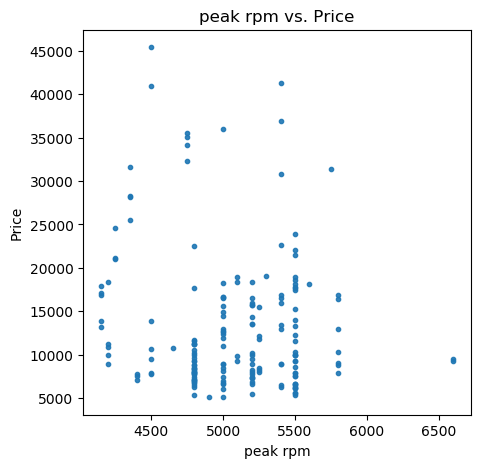

This does not have correlation with price so this will be dropped.


In [79]:
# Scatter Plot
draw_scatter_plot(master_df, "peakrpm", "price", 'peak rpm', 'Price', 5, 5, 0, 'peak rpm vs. Price', 0.9)

print('This does not have correlation with price so this will be dropped.')

#### Dropping peakrpm

In [80]:
try:
    print('Dropping peakrpm column')
    master_df.drop('peakrpm', axis=1, inplace=True)
except:
    print('Column already dropped')

Dropping peakrpm column


#### Visualise citympg vs price

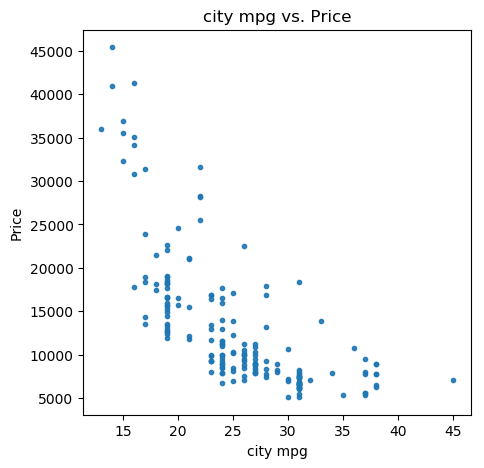

Lower the mileage higher the price, so these are negatively correlated. 
As checked earlier, correlation was -0.69


In [81]:
# Scatter Plot
draw_scatter_plot(master_df, "citympg", "price", 'city mpg', 'Price', 5, 5, 0, 'city mpg vs. Price', 0.9)

print('Lower the mileage higher the price, so these are negatively correlated.', '\nAs checked earlier, correlation was -0.69')

#### Visualise highwaympg vs price

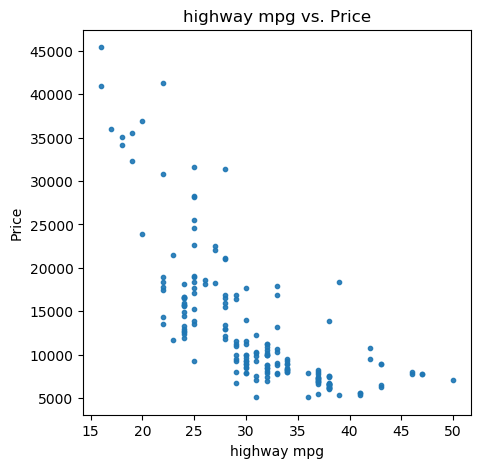

Lower the mileage higher the price, so these are negatively correlated. 
As checked earlier, correlation was -0.7


In [82]:
# Scatter Plot
draw_scatter_plot(master_df, "highwaympg", "price", 'highway mpg', 'Price', 5, 5, 0, 'highway mpg vs. Price', 0.9)

print('Lower the mileage higher the price, so these are negatively correlated.', '\nAs checked earlier, correlation was -0.7')

## Data Preparation

## Create Dummy Variables by converting catagorical data to numerical variables

#### From the data dictionary and from the data types, we know that following list of columns are catagorical variables:

* symboling
* aspiration
* doornumber
* carbody
* drivewheel
* enginelocation
* enginetype
* cylindernumber
* fuelsystem
* CompanyName

#### Creating dummy variables for symboling

In [83]:
columnName = 'symboling'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

[ 2  1  0 -1  3 -2]
   symboling_-2  symboling_-1  symboling_0  symboling_1  symboling_2  \
3             0             0            0            0            1   
4             0             0            0            0            1   
5             0             0            0            0            1   
6             0             0            0            1            0   
7             0             0            0            1            0   

   symboling_3  
3            0  
4            0  
5            0  
6            0  
7            0  
dropping -2
dropping symboling
droped variables


,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,...,horsepower,citympg,highwaympg,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
3,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,...,102,24,30,13950.0,audi,0,0,0,1,0


#### Creating dummy variables for aspiration

In [84]:
columnName = 'aspiration'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['std' 'turbo']
   aspiration_std  aspiration_turbo
3               1                 0
4               1                 0
5               1                 0
6               1                 0
7               1                 0
dropping turbo
dropping aspiration
droped variables


,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,citympg,highwaympg,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_std
3,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,...,24,30,13950.0,audi,0,0,0,1,0,1


#### Creating dummy variables for doornumber

In [85]:
columnName = 'doornumber'
master_df = create_dummy_variable(columnName, master_df, None)
master_df.head(1)

['four' 'two']
   doornumber_four  doornumber_two
3                1               0
4                1               0
5                0               1
6                1               0
7                1               0
dropping doornumber
droped variables


,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,...,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_std,doornumber_four,doornumber_two
3,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,...,13950.0,audi,0,0,0,1,0,1,1,0


#### Creating dummy variables for carbody

In [86]:
columnName = 'carbody'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['sedan' 'wagon' 'hatchback' 'hardtop' 'convertible']
   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
3                    0                0                  0              1   
4                    0                0                  0              1   
5                    0                0                  0              1   
6                    0                0                  0              1   
7                    0                0                  0              0   

   carbody_wagon  
3              0  
4              0  
5              0  
6              0  
7              1  
dropping convertible
dropping carbody
droped variables


,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,symboling_1,symboling_2,symboling_3,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
3,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,...,0,1,0,1,1,0,0,0,1,0


#### Creating dummy variables for drivewheel

In [87]:
columnName = 'drivewheel'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['fwd' '4wd' 'rwd']
   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd
3               0               1               0
4               1               0               0
5               0               1               0
6               0               1               0
7               0               1               0
dropping 4wd
dropping drivewheel
droped variables


,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,symboling_3,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
3,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,...,0,1,1,0,0,0,1,0,1,0


#### Creating dummy variables for enginelocation

In [88]:
columnName = 'enginelocation'
master_df = create_dummy_variable(columnName, master_df, None)
master_df.head(1)

['front']
   enginelocation_front
3                     1
4                     1
5                     1
6                     1
7                     1
dropping enginelocation
droped variables


,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,...,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_front
3,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,...,1,1,0,0,0,1,0,1,0,1


#### Creating dummy variables for enginetype

In [89]:
columnName = 'enginetype'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['ohc' 'dohc' 'ohcv' 'l' 'dohcv' 'ohcf']
   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3                0                 0             0               1   
4                0                 0             0               1   
5                0                 0             0               1   
6                0                 0             0               1   
7                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  
3                0                0  
4                0                0  
5                0                0  
6                0                0  
7                0                0  
dropping dohcv
dropping enginetype
droped variables


,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv
3,99.8,176.6,66.2,2337,four,109,mpfi,3.19,102,24,...,1,0,1,0,1,0,0,1,0,0


#### Creating dummy variables for cylindernumber

In [90]:
columnName = 'cylindernumber'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['four' 'five' 'six' 'twelve' 'eight']
   cylindernumber_eight  cylindernumber_five  cylindernumber_four  \
3                     0                    0                    1   
4                     0                    1                    0   
5                     0                    1                    0   
6                     0                    1                    0   
7                     0                    1                    0   

   cylindernumber_six  cylindernumber_twelve  
3                   0                      0  
4                   0                      0  
5                   0                      0  
6                   0                      0  
7                   0                      0  
dropping twelve
dropping cylindernumber
droped variables


,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,...,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six
3,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30,...,1,0,0,1,0,0,0,0,1,0


#### Creating dummy variables for fuelsystem

In [91]:
columnName = 'fuelsystem'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['mpfi' '2bbl' '1bbl' 'spfi' 'idi' 'spdi']
   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_idi  fuelsystem_mpfi  \
3                0                0               0                1   
4                0                0               0                1   
5                0                0               0                1   
6                0                0               0                1   
7                0                0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
3                0                0  
4                0                0  
5                0                0  
6                0                0  
7                0                0  
dropping spfi
dropping fuelsystem
droped variables


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,1,0,0,0,0,1,0


#### Creating dummy variables for CompanyName

In [92]:
columnName = 'CompanyName'
master_df = create_dummy_variable(columnName, master_df, remove_for_dummy[columnName])
master_df.head(1)

['audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda' 'buick'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault'
 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
   CompanyName_audi  CompanyName_bmw  CompanyName_buick  \
3                 1                0                  0   
4                 1                0                  0   
5                 1                0                  0   
6                 1                0                  0   
7                 1                0                  0   

   CompanyName_chevrolet  CompanyName_dodge  CompanyName_honda  \
3                      0                  0                  0   
4                      0                  0                  0   
5                      0                  0                  0   
6                      0                  0                  0   
7                      0                  0                  0   

   CompanyName_isuzu  CompanyName_jaguar  CompanyNa

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,0,0,0


## Derive new variable for Car Performance

#### Derive Combined MPG (miles per gallon) values from highway mpg and city mpg. 

Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.

In [93]:
master_df['CMPG'] = round((master_df.citympg * 0.55) + (master_df.highwaympg * 0.45), 2)
master_df.CMPG.head(5)

3    26.7
4    19.8
5    21.7
6    21.7
7    21.7
Name: CMPG, dtype: float64

#### We do not need citympg and highwaympg now as we have derived CMPG, lets drop both

In [94]:
colName = 'citympg'
try:
    master_df.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')
    
colName = 'highwaympg'
try:
    master_df.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

## Split into Train and Test datasets

In [95]:
# Splitting the avilable data into training and testing set

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale, using Normalisation (min-max scaling)

In [96]:
# Using MinMaxScaler to scale all the numeric variables (except dummy variables) the same scale between 0 and 1

scaler = MinMaxScaler()

vars = list(df_train.select_dtypes(exclude='uint8'))

df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,symboling_-1,symboling_0,...,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,CMPG
156,0.093525,0.199234,0.091954,0.094434,0.033898,0.226804,0.076271,0.048256,0,1,...,0,0,0,0,0,0,1,0,0,0.673394
107,0.532374,0.590038,0.551724,0.522810,0.127119,0.505155,0.190678,0.185631,0,1,...,1,0,0,0,0,0,0,0,0,0.236697
15,0.374101,0.634100,0.379310,0.618613,0.504237,0.670103,0.550847,0.707780,0,1,...,0,0,0,0,0,0,0,0,0,0.143119
20,0.050360,0.055556,0.000000,0.015967,0.000000,0.061856,0.076271,0.038206,0,1,...,0,0,0,0,0,0,0,0,0,0.933945
167,0.190647,0.388889,0.229885,0.303832,0.237288,0.670103,0.271186,0.090089,0,0,...,0,0,0,0,0,0,1,0,0,0.436697


#### Create training X and y

In [97]:
# Putting feature variable to X
X_train = df_train.drop(['price'], axis=1)

# Putting response variable to y
y_train = df_train['price']

#### Check VIF to understand multicollinearity at this stage

In [98]:
calculate_vif(X=X_train)

,Features,VIF
14,doornumber_two,inf
52,CompanyName_subaru,inf
25,enginetype_ohcf,inf
23,enginetype_l,inf
13,doornumber_four,inf
47,CompanyName_peugeot,inf
29,cylindernumber_four,429.00
24,enginetype_ohc,361.82
4,enginesize,164.96
28,cylindernumber_five,141.24


#### VIF data showing infinity values due to divide by zero. This is due to the phenomena r-squared is 1 which means our data set for these variables has very less entries due to which variance is 100% explainable or very high correlation exists among variables. Lets verify this.

In [99]:
print(X_train.groupby(X_train.CompanyName_subaru).size())
print('subaru has 12 observations\n')

print(X_train.groupby(X_train.CompanyName_peugeot).size())
print('peugeot has 11 observations\n')

print(X_train.groupby(X_train.enginetype_ohcf).size())
print('enginetype_ohcf has 12 observations\n')

print(X_train.groupby(X_train.enginetype_l).size())
print('enginetype_l has 11 observations\n')

CompanyName_subaru
0    119
1      9
dtype: int64
subaru has 12 observations

CompanyName_peugeot
0    121
1      7
dtype: int64
peugeot has 11 observations

enginetype_ohcf
0    119
1      9
dtype: int64
enginetype_ohcf has 12 observations

enginetype_l
0    121
1      7
dtype: int64
enginetype_l has 11 observations



#### Lets check if there is high correlation between enginetype_ohcf and CompanyName_subaru

In [100]:
X_train['enginetype_ohcf'].corr(X_train['CompanyName_subaru'])

1.0

#### CompanyName_subaru and enginetype_ohcf are highly correlated lets drop the brand subaru

In [101]:
colName = 'CompanyName_subaru'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Lets check if there is high correlation between enginetype_l and CompanyName_peugeot

In [102]:
X_train['enginetype_l'].corr(X_train['CompanyName_peugeot'])

0.9999999999999999

#### CompanyName_peugeot and enginetype_l are highly correlated lets drop the brand peugeot

In [103]:
colName = 'CompanyName_peugeot'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Lets check if there is high correlation between drivewheel_fwd and drivewheel_rwd

In [104]:
X_train['drivewheel_rwd'].corr(X_train['drivewheel_fwd'])

-0.8767806761729

#### Both are highly negatively correlated and lets drop both

In [105]:
colName = 'drivewheel_fwd'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')
    
colName = 'drivewheel_rwd'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Lets check if there is high correlation between doornumber_four and doornumber_two

In [106]:
X_train['doornumber_four'].corr(X_train['doornumber_two'])

-1.0

#### Both are highly negatively correlated and lets drop both

In [107]:
colName = 'doornumber_four'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')
    
colName = 'doornumber_two'
try:
    X_train.drop([colName], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Check VIF again

In [108]:
calculate_vif(X=X_train)

,Features,VIF
17,enginelocation_front,4703.08
25,cylindernumber_four,353.40
20,enginetype_ohc,318.74
21,enginetype_ohcf,142.32
19,enginetype_l,138.80
4,enginesize,136.86
24,cylindernumber_five,120.32
15,carbody_sedan,117.49
26,cylindernumber_six,92.50
14,carbody_hatchback,88.41


## Building our model

We will be using a mixed approach. Initially using the LinearRegression function from SciKit Learn for automatic variable selection (with RFE which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model.

### RFE
Recursive feature elimination

In [109]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('symboling_-1', False, 7),
 ('symboling_0', False, 3),
 ('symboling_1', False, 4),
 ('symboling_2', False, 5),
 ('symboling_3', False, 6),
 ('aspiration_std', False, 27),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('enginelocation_front', False, 32),
 ('enginetype_dohc', True, 1),
 ('enginetype_l', False, 17),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 22),
 ('cylindernumber_eight', False, 18),
 ('cylindernumber_five', False, 13),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 12),
 ('fuelsystem_1bbl', False, 9),
 ('fuelsystem_2bbl', False, 28),
 ('fuelsystem_idi', False, 26),
 ('fuelsystem_mpfi', False, 31),
 ('fuelsystem_spdi', False, 29),
 ('CompanyName_audi', Tru

#### Variables which are not considered significant by RFE

In [110]:
X_train.columns[~rfe.support_]

Index(['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'aspiration_std', 'enginelocation_front', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_plymouth', 'CompanyName_renault', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CMPG'],
      dtype='object')

#### Variables which are considered significant by RFE

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_ohcf',
       'cylindernumber_four', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_porsche', 'CompanyName_saab',
       'CompanyName_volvo'],
      dtype='object')

### Create new data sets with the rfe returned columns for training and derive new dataframe

In [112]:
# Create train data set with only rfe retrurned columns
X_train_rfe = X_train[col]

#### 1st model

In [113]:
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable

# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           6.69e-62
Time:                        18:56:57   Log-Likelihood:                 204.24
No. Observations:                 128   AIC:                            -366.5
Df Residuals:                     107   BIC:                            -306.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0281    

#### Check for multicollinearity amongst variables,
* using variance inflation factor (VIF) and follow this order:
    * remove variables with high VIF and high p-value (p>0.05)
    * remove variables with low VIF and high p-value (p>0.05)
    * remove variables with high VIF and low p-value (p<0.05)
    * remove variables with low VIF and low p-value (p<0.05)

##### NOTE: As seen earlier, some variables have very high correlation with price, so we will try not to drop them if possible like enginesize, curbweight, horsepower and carwidth

#### Check VIF

In [114]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
1,carlength,69.30
3,curbweight,39.83
2,carwidth,31.92
13,cylindernumber_four,25.48
9,carbody_sedan,23.10
5,boreratio,19.99
6,horsepower,18.95
4,enginesize,18.49
0,wheelbase,17.25
8,carbody_hatchback,10.64


#### Dropping carbody_sedan which has high VIF and high p-value

In [115]:
colName = 'carbody_sedan'
try:
    X_train_rfe.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 2nd Model

In [116]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           6.70e-63
Time:                        18:57:08   Log-Likelihood:                 204.12
No. Observations:                 128   AIC:                            -368.2
Df Residuals:                     108   BIC:                            -311.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0582    

#### Check VIF

In [117]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
1,carlength,62.40
3,curbweight,39.82
2,carwidth,30.74
6,horsepower,17.53
4,enginesize,17.39
0,wheelbase,16.67
5,boreratio,14.29
12,cylindernumber_four,6.16
15,CompanyName_buick,2.18
16,CompanyName_porsche,2.14


#### Dropping wheelbase which has high VIF and high p-value

In [118]:
colName = 'wheelbase'
try:
    X_train_rfe.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 3rd Model

In [119]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           3.57e-63
Time:                        18:57:18   Log-Likelihood:                 201.99
No. Observations:                 128   AIC:                            -366.0
Df Residuals:                     109   BIC:                            -311.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0592    

#### Check VIF

In [120]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
0,carlength,51.64
2,curbweight,39.05
1,carwidth,29.57
3,enginesize,17.37
5,horsepower,15.57
4,boreratio,14.16
11,cylindernumber_four,6.04
14,CompanyName_buick,2.18
15,CompanyName_porsche,2.13
7,carbody_hatchback,2.07


#### Dropping carlegnth which has high VIF and high p-value

In [121]:
colName = 'carlength'
try:
    X_train_rfe.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 4th Model

In [122]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.39e-63
Time:                        18:57:28   Log-Likelihood:                 200.24
No. Observations:                 128   AIC:                            -364.5
Df Residuals:                     110   BIC:                            -313.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0762    

#### Check VIF

In [123]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
1,curbweight,33.85
0,carwidth,17.61
2,enginesize,17.08
4,horsepower,14.92
3,boreratio,13.70
10,cylindernumber_four,3.92
13,CompanyName_buick,2.12
9,enginetype_ohcf,1.84
11,CompanyName_audi,1.83
7,carbody_wagon,1.81


#### Dropping carbody_hardtop which has high p-value

In [124]:
colName = 'carbody_hardtop'
try:
    X_train_rfe.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 5th Model

In [125]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           2.15e-64
Time:                        18:57:35   Log-Likelihood:                 199.54
No. Observations:                 128   AIC:                            -365.1
Df Residuals:                     111   BIC:                            -316.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0813    

#### Check VIF

In [126]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
1,curbweight,33.83
0,carwidth,17.57
2,enginesize,17.01
4,horsepower,14.87
3,boreratio,13.22
9,cylindernumber_four,3.91
12,CompanyName_buick,2.02
10,CompanyName_audi,1.82
8,enginetype_ohcf,1.81
6,carbody_wagon,1.80


#### Dropping carbody_hatchback as it has high p-value

In [127]:
colName = 'carbody_hatchback'
try:
    X_train_rfe.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 6th Model

In [128]:
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           7.94e-65
Time:                        18:57:42   Log-Likelihood:                 197.82
No. Observations:                 128   AIC:                            -363.6
Df Residuals:                     112   BIC:                            -318.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0902    

#### Check VIF

In [129]:
calculate_vif(X=X_train_rfe.drop(['const'], axis=1))

,Features,VIF
1,curbweight,33.82
0,carwidth,17.39
2,enginesize,17.00
4,horsepower,14.21
3,boreratio,13.22
8,cylindernumber_four,3.39
11,CompanyName_buick,2.02
9,CompanyName_audi,1.82
7,enginetype_ohcf,1.79
12,CompanyName_porsche,1.75


#### We have only 1 variable left having high p-value. Dropping horsepower which has high VIF and high p-value.

In [130]:
colName = 'horsepower'
try:
    X_train_rfe_7 = X_train_rfe.drop([colName], axis=1)
except:
    print(colName + ' already dropped')

#### 7th Model

In [131]:
# Running the linear model
lm_7 = sm.OLS(y_train,X_train_rfe_7).fit()

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     147.9
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.02e-65
Time:                        18:57:49   Log-Likelihood:                 197.28
No. Observations:                 128   AIC:                            -364.6
Df Residuals:                     113   BIC:                            -321.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0837    

##### If you notice, adjusted R squared has not changed between 6th model and 7th model and we have now all p-values quite low than 0.05

### Residual Analysis of the train data using 7th model having 14 feature variables

So now lets check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

#### Predict on training data using model 7

In [132]:
y_train_pred = lm_7.predict(X_train_rfe_7)

#### Check r-squared

In [133]:
# r-squared
r2_score(y_train, y_train_pred)

0.9482550277608094

#### Plot y_train and y_train_pred to understand spread

Text(0, 0.5, 'y_train_pred')

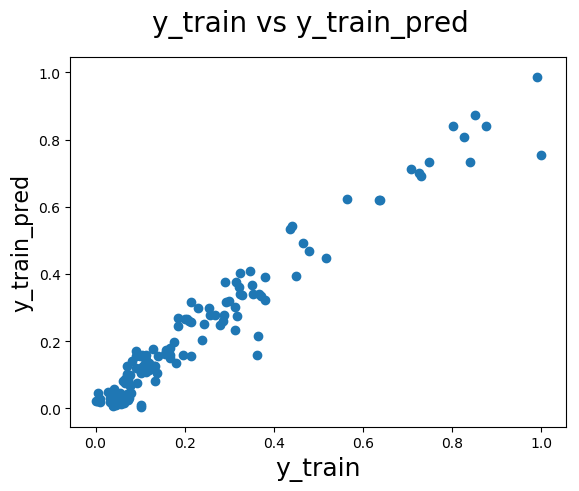

In [134]:
# Plotting y_train and y_train_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                                # X-label
plt.ylabel('y_train_pred', fontsize=16)                           # Y-label

#### Plot histogram of error terms

Text(0.5, 0, 'Errors')

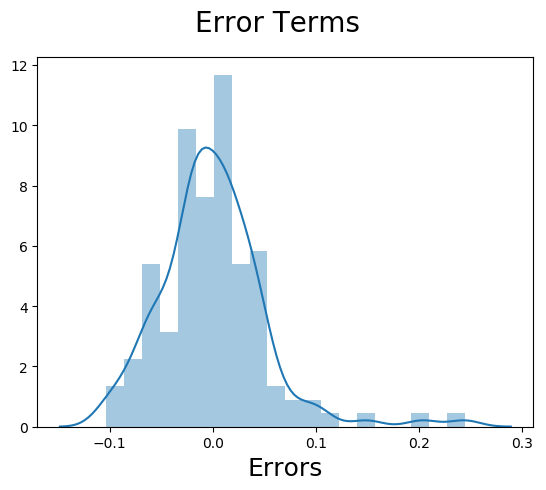

In [135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Predict on testing data using model 7

#### Rescale test dataset

In [136]:
vars = list(df_test.select_dtypes(exclude='uint8'))

df_test[vars] = scaler.transform(df_test[vars])

df_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,symboling_-1,symboling_0,...,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,CMPG
14,0.374101,0.634100,0.379310,0.538777,0.313559,0.350515,0.292373,0.536268,0,0,...,0,0,0,0,0,0,0,0,0,0.273394
183,0.151079,0.302682,0.218391,0.152828,0.080508,0.226804,0.139831,0.076966,0,0,...,0,0,0,0,0,0,0,1,0,0.563303
19,0.050360,0.000000,0.000000,0.000000,0.000000,0.061856,0.076271,0.030454,0,0,...,0,0,0,0,0,0,0,0,0,0.933945
89,0.050360,0.180077,0.022989,0.006843,0.029661,0.185567,0.072034,0.008416,0,0,...,0,0,0,0,0,0,0,0,0,0.693578
61,0.205036,0.419540,0.333333,0.233120,0.135593,0.432990,0.135593,0.149502,0,0,...,0,0,0,0,0,0,0,0,0,0.510092


#### Dividing test dataset into X_test and y_test

In [137]:
y_test = df_test.pop('price')
X_test = df_test

#### Predictions

In [138]:
# Use model 7 for predictions

X_train_new = X_train_rfe_7.drop(['const'], axis=1)

X_test_rfe = X_test[X_train_new.columns]

X_test_rfe = sm.add_constant(X_test_rfe) # Adding a constant variable

# Making predictions
y_test_pred = lm_7.predict(X_test_rfe)

### Model Evaluation

#### Check r-squared

In [139]:
# r-squared
r2_score(y_test, y_test_pred)

0.8967118907331266

#### Note that r-squared on testing data using model 7 is about 89.7%, while on training data is about 94.8%.

#### Check Actual Vs Predicted on test data

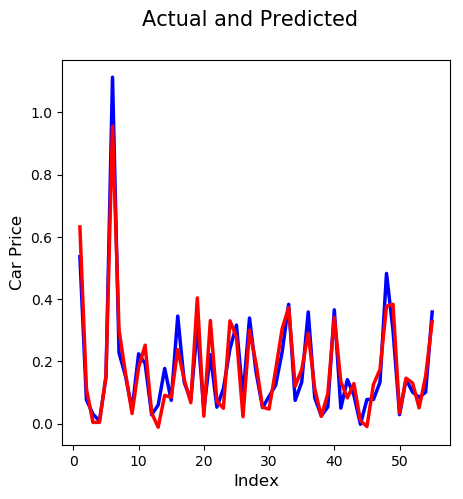

In [140]:
c = [i for i in range(1,56,1)] # generating index 

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(5,5))

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")       # Plotting Actual
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")  # Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)                     # Plot heading 
plt.xlabel('Index', fontsize=12)                                      # X-label
plt.ylabel('Car Price', fontsize=12)                                  # Y-label
plt.show()

#### Plot y_test and y_test_pred to understand spread

Text(0, 0.5, 'y_test_pred')

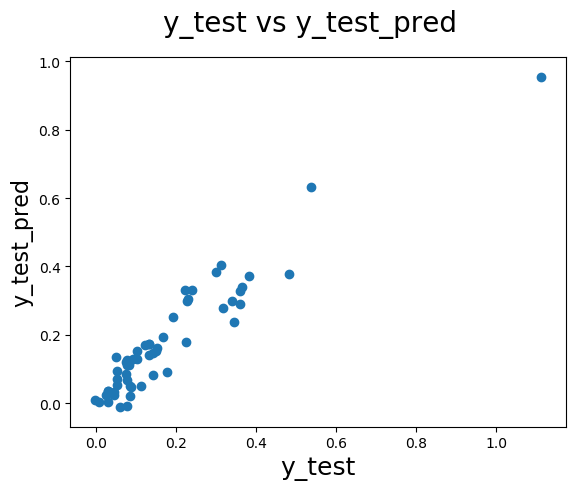

In [141]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

#### Plot histogram of error terms

Text(0.5, 0, 'Errors')

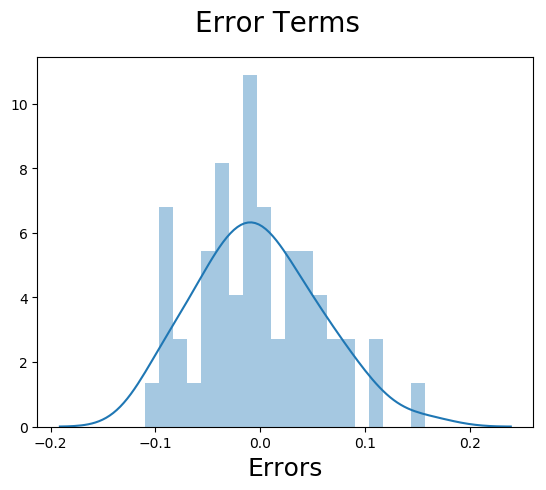

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Check RMSE

In [143]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.05741148035079733


#### Check MSE

In [144]:
print('Mean_Squared_Error :', mean_squared_error(y_test, y_test_pred))

Mean_Squared_Error : 0.0032960780760699876


### Model 7 is a very good model. It is predicting well. Error term distribution is normal. R-squared on testing data and training data, quite close. RMSE and MSE are also very low. R-squared and adjusted R-squared almost same. Good overlap between actual and predicted data.

### Lets try performing residual analysis using model 6 as well as there was no change in adjusted R squared between model 6 and 7.

#### Predict on training data using model 6

In [145]:
y_train_pred = lm_6.predict(X_train_rfe)

#### Check r-squared

In [146]:
# r-squared
r2_score(y_train, y_train_pred)

0.9486866684681383

#### Plot y_train and y_train_pred to understand spread

Text(0, 0.5, 'y_train_pred')

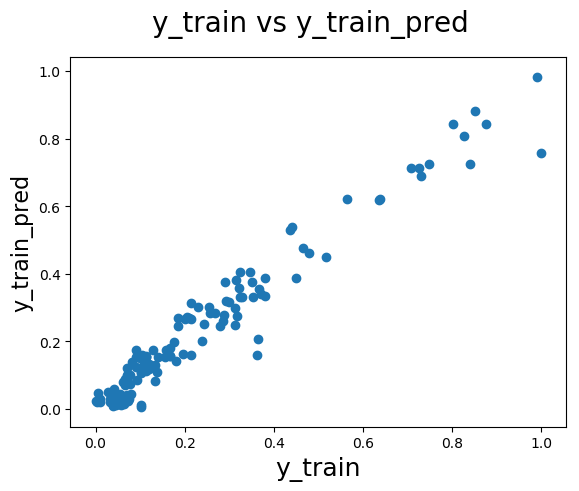

In [147]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                                # X-label
plt.ylabel('y_train_pred', fontsize=16)                           # Y-label

#### Plot historgram of error terms

Text(0.5, 0, 'Errors')

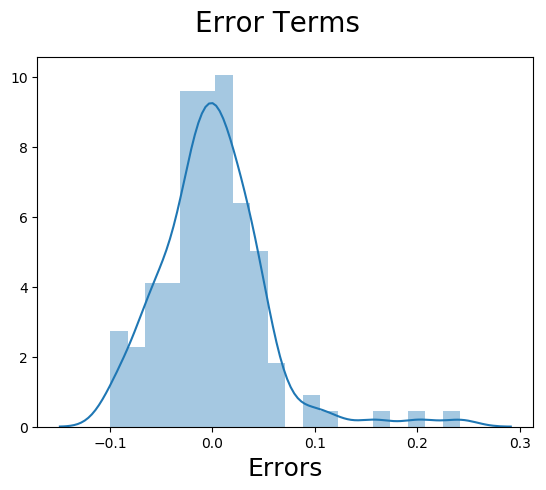

In [148]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Predict on testing data using model 6

#### Create test dataset using model 6 feature variables and predict

In [149]:
# Use model 6 for predictions

X_train_new = X_train_rfe.drop(['const'], axis=1)

X_test_rfe = X_test[X_train_new.columns]

X_test_rfe = sm.add_constant(X_test_rfe) # Adding a constant variable

# Making predictions
y_test_pred = lm_6.predict(X_test_rfe)

### Model Evaluation

#### Chceck r-squared

In [150]:
# r-squared
r2_score(y_test, y_test_pred)

0.898840147780563

#### Note that r-squared on testing data using model 6 is about 89.9%, while on training data is about 94.9%.

#### Check Actual Vs Predicted on test data

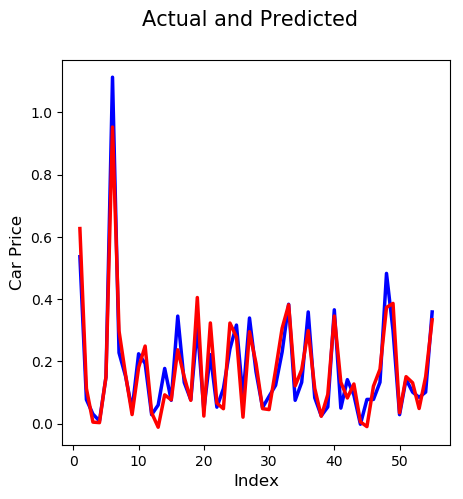

In [151]:
c = [i for i in range(1,56,1)] # generating index 

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(5,5))

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")       # Plotting Actual
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")  # Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)                     # Plot heading 
plt.xlabel('Index', fontsize=12)                                      # X-label
plt.ylabel('Car Price', fontsize=12)                                  # Y-label
plt.show()

#### Plot y_test and y_test_pred to understand spread

Text(0, 0.5, 'y_test_pred')

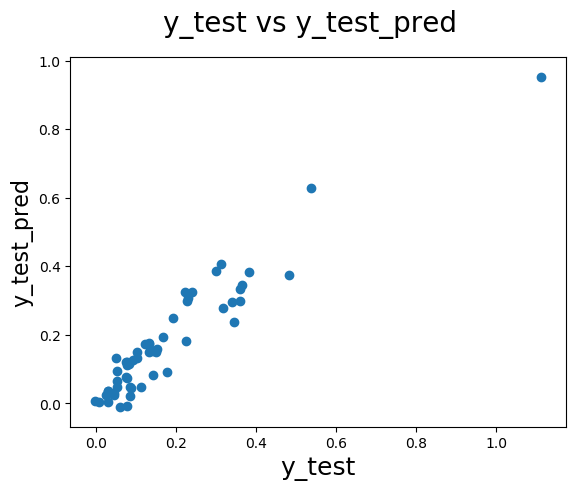

In [152]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

#### Plot histogram of error terms

Text(0.5, 0, 'Errors')

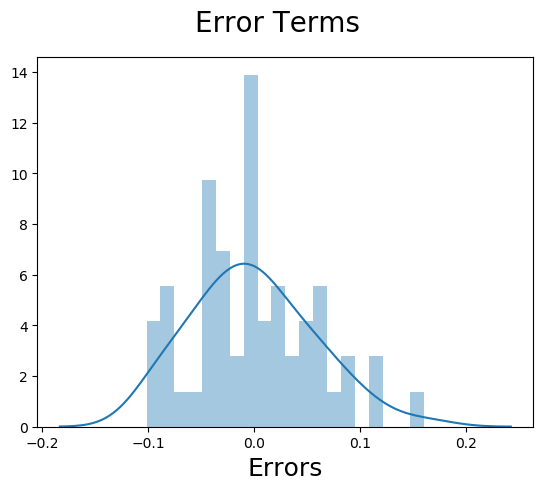

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Check RMSE

In [154]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.056816918343153194


#### Check MSE

In [155]:
print('Mean_Squared_Error :', mean_squared_error(y_test, y_test_pred))

Mean_Squared_Error : 0.0032281622100125383


### Model 6 is also a good model. It is predicting well. Error term distribution is normal. R-squared on testing data and training data, quite close. RMSE and MSE are also very low. R-squared and adjusted R-squared almost same. Good overlap between actual and predicted data.

### Both model 6 and 7 are good models. 

#### Model 6 has 15 feature variables and Model 7 has 14 feature variables. Model 6 has horsepower which has high p-value (>0.05) but we had seen earlier that horsepower has very high correlation with price (0.81) so it is an important variable.

### Lets try if we can get another good model which has less number of features so our model looks simpler.

#### RFE
Recursive Feature Elimination

In [156]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('symboling_-1', False, 17),
 ('symboling_0', False, 13),
 ('symboling_1', False, 14),
 ('symboling_2', False, 15),
 ('symboling_3', False, 16),
 ('aspiration_std', False, 37),
 ('carbody_hardtop', False, 8),
 ('carbody_hatchback', False, 9),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 10),
 ('enginelocation_front', False, 42),
 ('enginetype_dohc', False, 7),
 ('enginetype_l', False, 27),
 ('enginetype_ohc', False, 12),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 32),
 ('cylindernumber_eight', False, 28),
 ('cylindernumber_five', False, 23),
 ('cylindernumber_four', False, 5),
 ('cylindernumber_six', False, 22),
 ('fuelsystem_1bbl', False, 19),
 ('fuelsystem_2bbl', False, 38),
 ('fuelsystem_idi', False, 36),
 ('fuelsystem_mpfi', False, 41),
 ('fuelsystem_spdi', False, 39),
 ('Compa

#### Variables which are considered significant by RFE

In [157]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_porsche', 'CompanyName_saab'],
      dtype='object')

#### Create new data sets with the rfe returned columns for training and derive new dataframe

In [158]:
X_train_rfe_simple = X_train[col]

X_train_rfe_simple.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_porsche,CompanyName_saab
156,0.093525,0.199234,0.091954,0.094434,0.033898,0.076271,0,0,0,0
107,0.532374,0.590038,0.551724,0.522810,0.127119,0.190678,0,0,0,0
15,0.374101,0.634100,0.379310,0.618613,0.504237,0.550847,1,0,0,0
20,0.050360,0.055556,0.000000,0.015967,0.000000,0.076271,0,0,0,0
167,0.190647,0.388889,0.229885,0.303832,0.237288,0.271186,0,0,0,0


#### 1st Model

In [159]:
X_train_rfe_simple = sm.add_constant(X_train_rfe_simple) # Adding a constant variable

# Running the linear model
lm_simple_1 = sm.OLS(y_train,X_train_rfe_simple).fit()

#Let's see the summary of our linear model
print(lm_simple_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     162.8
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           9.58e-64
Time:                        18:59:32   Log-Likelihood:                 180.71
No. Observations:                 128   AIC:                            -339.4
Df Residuals:                     117   BIC:                            -308.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0074    

#### Check VIF

In [160]:
calculate_vif(X=X_train_rfe_simple.drop(['const'], axis=1))

,Features,VIF
3,curbweight,33.65
1,carlength,32.17
2,carwidth,16.43
0,wheelbase,14.76
5,horsepower,13.36
4,enginesize,11.27
7,CompanyName_buick,1.94
8,CompanyName_porsche,1.63
6,CompanyName_bmw,1.26
9,CompanyName_saab,1.18


#### We had seen earlier that curbweight, carwidth, enginesize and horsepower, are having very high correlation with price.
#### Lets not drop these for now just based on high VIF. For now, Lets drop those variables having high p-value.

#### Dropping CompanyName_porsche as having high p-value

In [161]:
colName = 'CompanyName_porsche'
try:
    X_train_rfe_simple.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped...')

#### 2nd Model

In [162]:
# Running the linear model
lm_simple_2 = sm.OLS(y_train,X_train_rfe_simple).fit()

#Let's see the summary of our linear model
print(lm_simple_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.76e-64
Time:                        18:59:41   Log-Likelihood:                 179.68
No. Observations:                 128   AIC:                            -339.4
Df Residuals:                     118   BIC:                            -310.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0087      0.01

#### Dropping wheelbase as having high p-value

In [163]:
colName = 'wheelbase'
try:
    X_train_rfe_simple.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped...')

#### 3rd Model

In [164]:
# Running the linear model
lm_simple_3 = sm.OLS(y_train,X_train_rfe_simple).fit()

#Let's see the summary of our linear model
print(lm_simple_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           5.66e-65
Time:                        18:59:46   Log-Likelihood:                 178.01
No. Observations:                 128   AIC:                            -338.0
Df Residuals:                     119   BIC:                            -312.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0035      0.01

#### Dropping CompanyName_saab as having high p-value

In [165]:
colName = 'CompanyName_saab'
try:
    X_train_rfe_simple.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped')

#### 4th Model

In [166]:
# Running the linear model
lm_simple_4 = sm.OLS(y_train,X_train_rfe_simple).fit()

#Let's see the summary of our linear model
print(lm_simple_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.86e-65
Time:                        18:59:50   Log-Likelihood:                 176.25
No. Observations:                 128   AIC:                            -336.5
Df Residuals:                     120   BIC:                            -313.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0017      0.01

#### Dropping carlength as having high p-value

In [167]:
colName = 'carlength'
try:
    X_train_rfe_simple.drop([colName], axis=1 , inplace=True)
except:
    print(colName + ' already dropped...')

#### 5th Model

In [168]:
# Running the linear model
lm_simple_5 = sm.OLS(y_train,X_train_rfe_simple).fit()

#Let's see the summary of our linear model
print(lm_simple_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           3.57e-66
Time:                        18:59:56   Log-Likelihood:                 175.01
No. Observations:                 128   AIC:                            -336.0
Df Residuals:                     121   BIC:                            -316.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0123      0.01

### This model 5 (lm_simple_5) looks good, lets stop here and perform residual analysis on it.

### Residual Analysis of the train data using model 5 which is simple enough and having 6 variables

So now lets check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

#### Predict on training data using model 5

In [169]:
y_train_pred_simple = lm_simple_5.predict(X_train_rfe_simple)

#### Check r-squared

In [170]:
# r-squared
r2_score(y_train, y_train_pred_simple)

0.9267139481560566

#### Plot y_train and y_train_pred_simple to understand spread

Text(0, 0.5, 'y_train_pred')

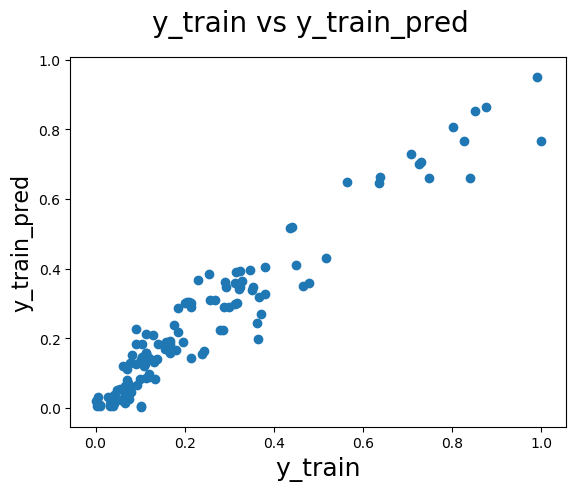

In [171]:
# Plotting y_train and y_train_pred_simple to understand the spread
fig = plt.figure()
plt.scatter(y_train,y_train_pred_simple)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                                # X-label
plt.ylabel('y_train_pred', fontsize=16)   

#### Plot historgram of error terms

Text(0.5, 0, 'Errors')

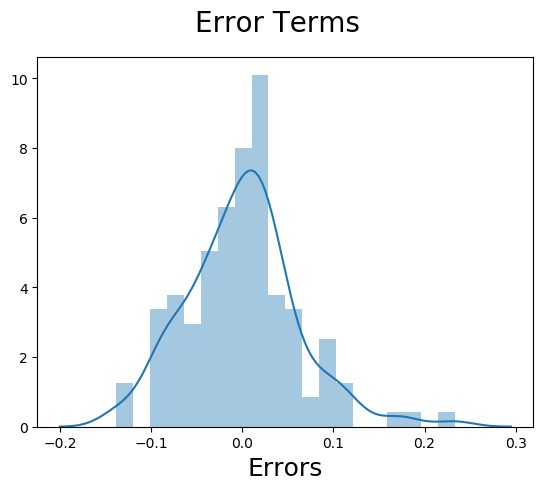

In [172]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_simple), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Predict on testing data using model 5

#### Create testing data using model 5 feature variables and predict

In [173]:
# Use model 5 for predictions (lm_simple_5)

X_train_new_simple = X_train_rfe_simple.drop(['const'], axis=1)

X_test_rfe_simple = X_test[X_train_new_simple.columns]

X_test_rfe_simple = sm.add_constant(X_test_rfe_simple) # Adding a constant variable

# Making predictions
y_test_pred_simple = lm_simple_5.predict(X_test_rfe_simple)

### Model Evaluation

#### Check r-squared

In [174]:
# r-squared
r2_score(y_test, y_test_pred_simple)

0.8626730511336597

#### Note that r-squared on testing data using model 5 is about 86.3%, while on training data is about 92.7%.

#### Check Actual Vs Predicted on test data

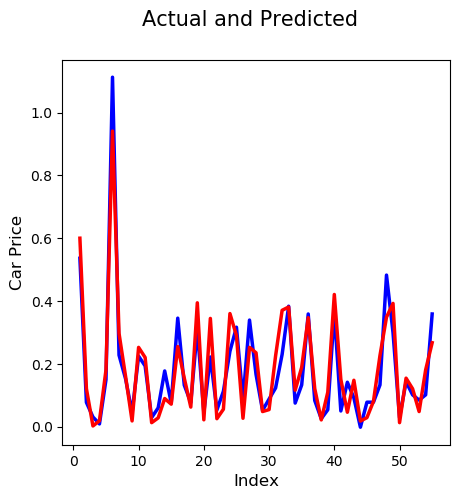

In [175]:
c = [i for i in range(1,56,1)] # generating index 

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(5,5))

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")              # Plotting Actual
plt.plot(c, y_test_pred_simple, color="red",  linewidth=2.5, linestyle="-")  # Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)                            # Plot heading 
plt.xlabel('Index', fontsize=12)                                             # X-label
plt.ylabel('Car Price', fontsize=12)                                         # Y-label
plt.show()

#### Plot y_test and y_test_pred_simple to understand spread

Text(0, 0.5, 'y_test_pred')

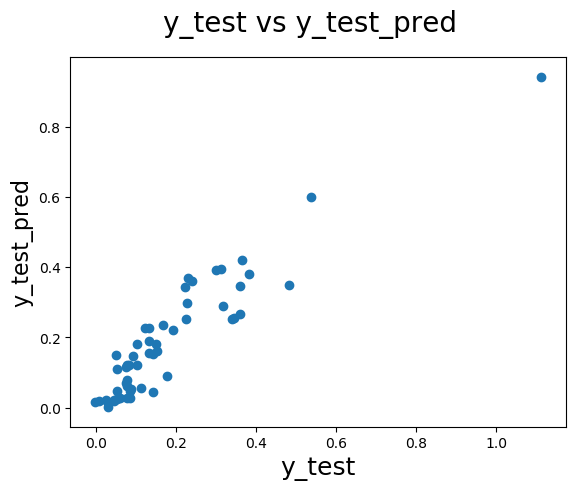

In [176]:
# Plotting y_test and y_test_pred_simple to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred_simple)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

#### Plot histogram of error terms

Text(0.5, 0, 'Errors')

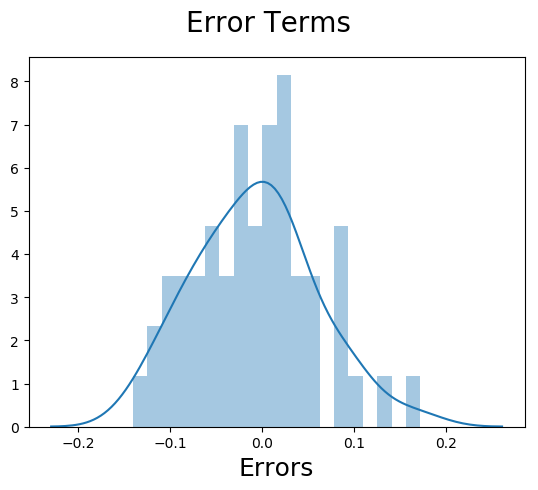

In [177]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred_simple), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Check RMSE

In [178]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_simple)))

RMSE : 0.06619900578266788


#### Check MSE

In [179]:
print('Mean_Squared_Error :', mean_squared_error(y_test, y_test_pred_simple))

Mean_Squared_Error : 0.004382308366613696


We can see that the equation of our best fitted line from model 5 (lm_simple_5) is:

$ price = 0.2556  \times  carwidth + 0.1467  \times  curbweight + 0.3554 \times enginesize + 0.1859 \times horsepower + 0.2707 \times CompanyName\_bmw + 0.1576 \times CompanyName\_buick $

### Model 5 is also a good model. It is predicting well. Error term distribution is normal. R-squared on testing data and training data, quite close. RMSE and MSE are also very low. R-squared and adjusted R-squared almost same. Good overlap between actual and predicted data.

#### This model is simpler in comparision to earlier models. It has only 6 feature variables.

#### Lets pickup those feature variables which are  common in most of 3 models on which residual analysis was performed. And those feature variables are present in model 5 (lm_simple_5). Lets consider this as final model for recommendations.


#### The final model contains only highly significant variables

1. There are no redundent variables as there is no gap between the r square(0.927) and adj r square(0.923)
2. Model is predicting pretty well as the graphs are over lapping very well.
3. Lower values of RMSE(0.066) indicates a better fit
4. Prediciton accuracy of model is good as RMSE value is much lower
5. The quality of estimation is good as MSE very much closer to 0 (0.004)
6. The model is fitting data very well as the r square value is more than 86%

##### Hence we can conclude that the final model predicts car price with enough accuracy. It is simple also as contains only 6 features.

#### Independent feature variables, which are significant in predicting the price of a car in US market, given below:

a). carwidth
b). curbweight
c). enginesize
d). horsepower
e). CompanyName_bmw
f). CompanyName_buick

### Recommendations

1. Geely Auto manufacturers can try to work in collaboration with these brands if aiming higher segment of cars or can look to acquire these brands if possible.
2. Geely Auto manufacturers can adjust carwidth, curbweight, enginesize and horsepower to manufacture cars in different segments and launch in US Market.